# Project : Predict Fraud/Correct Loan applications

Bank's and financial organization earn's a good chunk of their revenue from lending loans . So filtered out correct loan applications is the hardest and most important part . Manually selecting the right Loan application is nearly impossible but Data Science and Machine Learning make it possible .

This dataset has information on applicants age,marital_status,house,income,Loan_amount_requested,Loan_term etc and it has a target variable 'Is_fraud'.
Yes means the application is Fraud and No means that the application is correct or not fraud .

In this Project i have done done in_depth EDA to find important insights like when the applicants Credit_score is less than 650 , then the fraud percentage becomes 46.70 % which is almost 30% higher than average . Applications where the applicants has zero_income , then the fraud percentage rose to 37.82% .

I have used 7 different ML algorithms to predict the Fraud and Correct loan applications . I have got an accuracy score of 84.89% and different algorithms can serve different purpose in terms of predicting Frauds and Non_frauds . I hope this project has done some justice and please look below and share your valuable thoughts .

In [ ]:
import numpy as np  ## Importing numpy library for data analysis .
import pandas as pd  ## Importing Pandas library for data analysis .
import matplotlib.pyplot as plt  ## Importing matplotlib library for data visualization .
%matplotlib inline
import seaborn as sns  ## Importing seaborn library for data visualization .
import plotly.express as px ## Importing plotly express for advance data visualization .

In [ ]:
Fraud_raw=pd.read_csv("/content/account_data.csv")
fraud=Fraud_raw.copy() ## Create a copy of our dataset for further analysis .
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [ ]:
fraud.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

In [ ]:
fraud.describe().T ## describe function will show min , max , mean , standard deviation , q1 , q2 or median and q3 for all numeric columns .

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,34.83790,12.631048,22.0,22.0,31.0,45.00,56.0
Dependents,10000.0,1.32340,1.506399,0.0,0.0,1.0,2.00,4.0
AddressDuration,10000.0,69.08740,84.854114,1.0,1.0,50.0,86.00,360.0
CreditScore,10000.0,768.70130,74.280933,580.0,721.0,801.0,830.00,830.0
IncomeLevel,10000.0,45994.61560,44648.184654,0.0,8277.5,32791.0,71698.00,150000.0
LoanAmountRequested,10000.0,57218.91560,72897.716564,2000.0,10555.0,44008.5,68073.75,300000.0
LoanTerm,10000.0,13.84770,10.923508,1.0,2.0,13.0,24.00,30.0
InterestRate,10000.0,5.14997,0.973665,4.5,4.5,4.5,5.60,8.0
PreviousLoans,10000.0,1.65690,1.172996,0.0,1.0,1.0,2.00,4.0
ExistingLiabilities,10000.0,3046.74250,2091.148502,0.0,1222.0,3231.0,4545.25,7000.0


In [ ]:
fraud=fraud.drop_duplicates() ## drop_duplicates will drop all the duplicate rows .
fraud.shape

(10000, 29)

In [ ]:
fraud.columns ## columns function will show the name of all columns .

Index(['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus',
       'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested',
       'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate',
       'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior',
       'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction',
       'AccountActivity', 'PaymentBehavior', 'Blacklists',
       'EmploymentVerification', 'PastFinancialMalpractices',
       'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData',
       'Referral', 'IsFraud'],
      dtype='object')

In [ ]:
## Renaming some columns to make it more robust and easy to understand .
fraud=fraud.rename(columns={'MaritalStatus':'Marital_status','ResidentialStatus':'Residence','AddressDuration':'Address_duration','CreditScore':'Credit_score',
                    'IncomeLevel':'Income','LoanAmountRequested':'Loan_req','LoanTerm':'Loan_term','PurposeoftheLoan':'Loan_purpose','InterestRate':'Interest',
                    'PreviousLoans':'Previous_loans','ExistingLiabilities':'Liabilities','ApplicationBehavior':'Application_behavior',
                    'LocationofApplication':'Application_location','ChangeinBehavior':'Changein_behavior','TimeofTransaction':'Transaction_time',
                    'AccountActivity':'Account_activity','PaymentBehavior':'Payment_behavior','EmploymentVerification':'Emp_verification',
                    'PastFinancialMalpractices':'Bad_financial_history','DeviceInformation':'Device_information','SocialMediaFootprint':'Social_media',
                    'ConsistencyinData':'Data_consistency','IsFraud':'Is_fraud'})

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [ ]:
## Created a for loop to see the percentage of null values in all column .
for i in fraud.columns :
  print(f"Percentage of null or missing values in {i} :", (fraud[i].isnull().sum()*100)/len(fraud[i]))

Percentage of null or missing values in Age : 0.0
Percentage of null or missing values in Occupation : 0.0
Percentage of null or missing values in Marital_status : 0.0
Percentage of null or missing values in Dependents : 0.0
Percentage of null or missing values in Residence : 0.0
Percentage of null or missing values in Address_duration : 0.0
Percentage of null or missing values in Credit_score : 0.0
Percentage of null or missing values in Income : 0.0
Percentage of null or missing values in Loan_req : 0.0
Percentage of null or missing values in Loan_term : 0.0
Percentage of null or missing values in Loan_purpose : 0.0
Percentage of null or missing values in Collateral : 0.0
Percentage of null or missing values in Interest : 0.0
Percentage of null or missing values in Previous_loans : 0.0
Percentage of null or missing values in Liabilities : 0.0
Percentage of null or missing values in Application_behavior : 0.0
Percentage of null or missing values in Application_location : 0.0
Percentag

In [ ]:
fraud.columns ## columns function will show the name of all columns .

Index(['Age', 'Occupation', 'Marital_status', 'Dependents', 'Residence',
       'Address_duration', 'Credit_score', 'Income', 'Loan_req', 'Loan_term',
       'Loan_purpose', 'Collateral', 'Interest', 'Previous_loans',
       'Liabilities', 'Application_behavior', 'Application_location',
       'Changein_behavior', 'Transaction_time', 'Account_activity',
       'Payment_behavior', 'Blacklists', 'Emp_verification',
       'Bad_financial_history', 'Device_information', 'Social_media',
       'Data_consistency', 'Referral', 'Is_fraud'],
      dtype='object')

In [ ]:
num_columns=fraud[['Age','Dependents','Address_duration','Credit_score','Income','Loan_req','Loan_term','Interest','Previous_loans','Liabilities']]
num_columns.head() ## head function will show us the top 5 rows .

,Age,Dependents,Address_duration,Credit_score,Income,Loan_req,Loan_term,Interest,Previous_loans,Liabilities
0,56,4,1,827,52033,300000,25,4.5,1,7000
1,40,0,1,830,42893,8105,3,5.4,2,4244
2,25,0,360,809,141233,75734,19,4.6,3,0
3,34,0,92,630,9217,2000,1,4.7,1,4373
4,47,0,26,733,47979,67767,1,8.0,1,2499


Creating a for loop with histogram for all the numeric columns to see their distribution and also we can see each columns mean , median, min and max values .

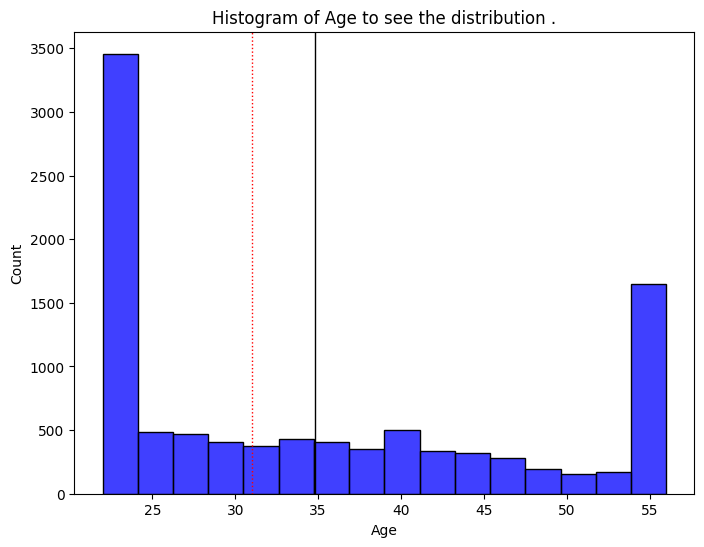

*************************************************
Mean or avg of Age : 34.8379
Median of Age : 31.0
Max value of Age : 56
Min value of Age : 22


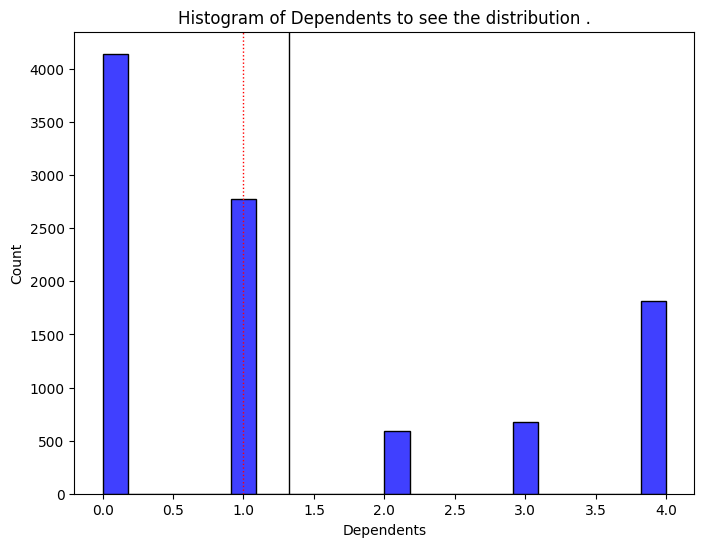

*************************************************
Mean or avg of Dependents : 1.3234
Median of Dependents : 1.0
Max value of Dependents : 4
Min value of Dependents : 0


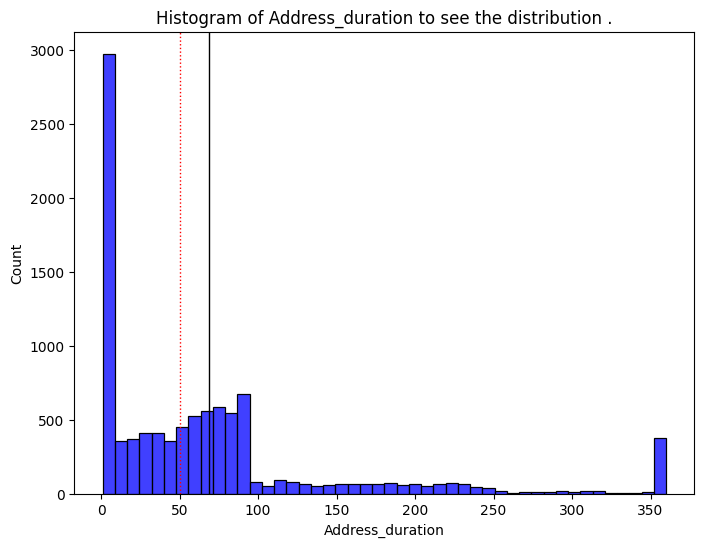

*************************************************
Mean or avg of Address_duration : 69.0874
Median of Address_duration : 50.0
Max value of Address_duration : 360
Min value of Address_duration : 1


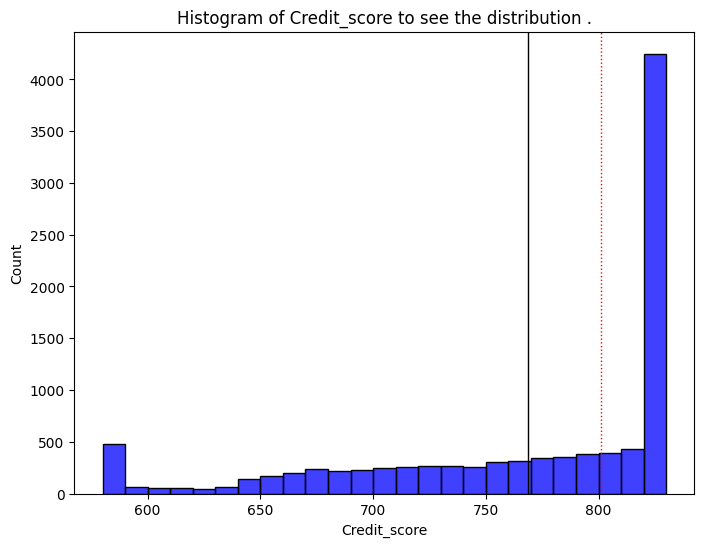

*************************************************
Mean or avg of Credit_score : 768.7013
Median of Credit_score : 801.0
Max value of Credit_score : 830
Min value of Credit_score : 580


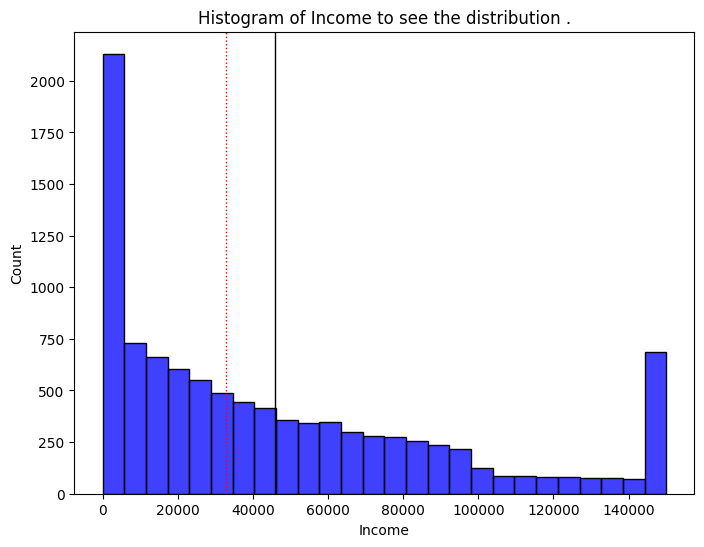

*************************************************
Mean or avg of Income : 45994.6156
Median of Income : 32791.0
Max value of Income : 150000
Min value of Income : 0


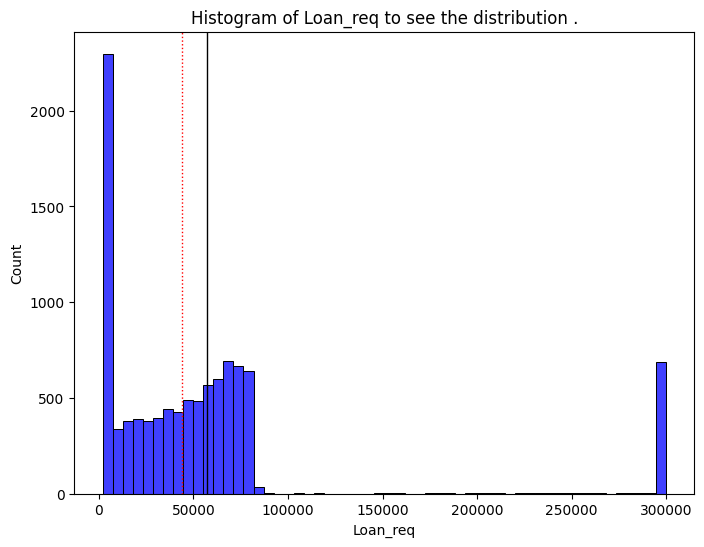

*************************************************
Mean or avg of Loan_req : 57218.9156
Median of Loan_req : 44008.5
Max value of Loan_req : 300000
Min value of Loan_req : 2000


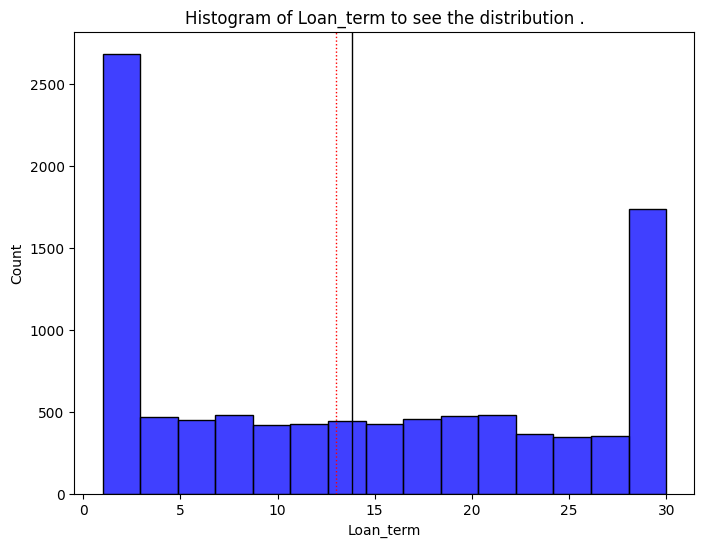

*************************************************
Mean or avg of Loan_term : 13.8477
Median of Loan_term : 13.0
Max value of Loan_term : 30
Min value of Loan_term : 1


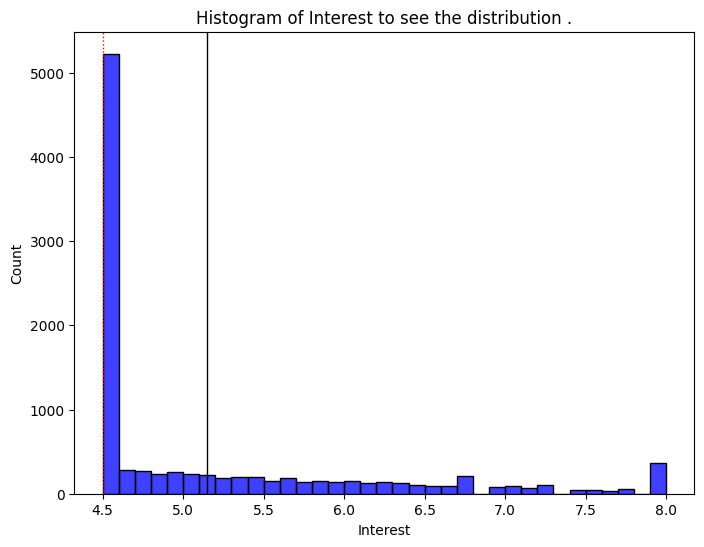

*************************************************
Mean or avg of Interest : 5.14997
Median of Interest : 4.5
Max value of Interest : 8.0
Min value of Interest : 4.5


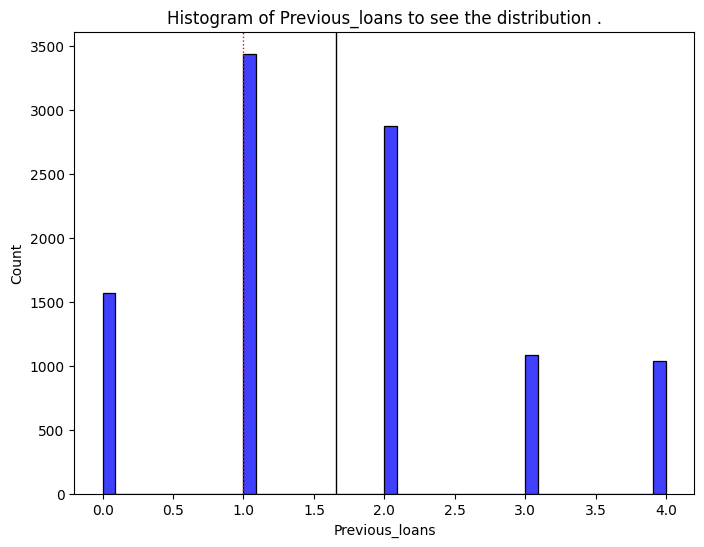

*************************************************
Mean or avg of Previous_loans : 1.6569
Median of Previous_loans : 1.0
Max value of Previous_loans : 4
Min value of Previous_loans : 0


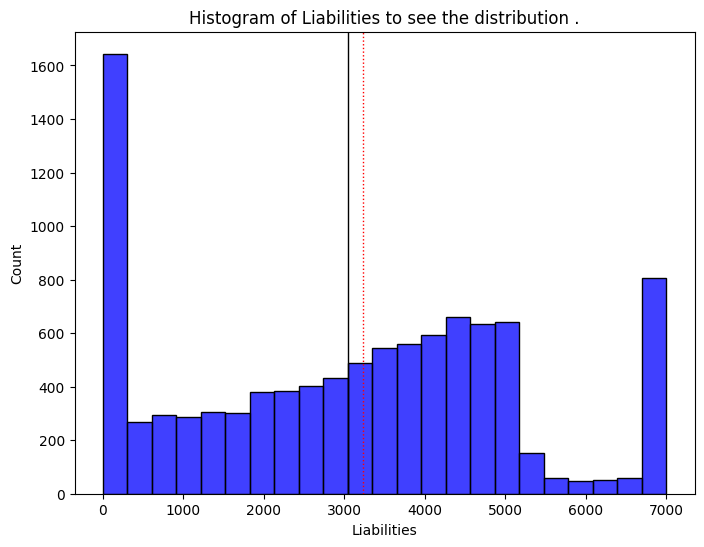

*************************************************
Mean or avg of Liabilities : 3046.7425
Median of Liabilities : 3231.0
Max value of Liabilities : 7000
Min value of Liabilities : 0


In [ ]:
for i in num_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(8,6))   ## Selecting the size of each plot .
  sns.histplot(data=num_columns,x=i,color='blue')
  plt.axvline(x=num_columns[i].mean(),linewidth=1,color='black',linestyle='solid') ## Creating a line for mean .
  plt.axvline(x=num_columns[i].median(),linewidth=1,color='red',linestyle='dotted') ## Creating a line for median .
  plt.title(f"Histogram of {i} to see the distribution .")
  plt.show() ## show will show all the visuals .
  print("*************************************************")
  print(f"Mean or avg of {i} :", num_columns[i].mean())
  print(f"Median of {i} :", num_columns[i].median())
  print(f"Max value of {i} :", num_columns[i].max())
  print(f"Min value of {i} :", num_columns[i].min())

**Important insights :**

A good amount of applicant's age is less than 25 years .

Close to 3k applicant's address duration is between 0-20 .

A good number of applicant's credit score is more than 800 .

Almost 2k applicant's has zero income and few has income more than 140k .

Most of the loan interest is around 4.5% .

In [ ]:
young_age=fraud[fraud.Age<25] ## Using filter method to fetch the matching rows .
young_age.shape ## shape function will show total no of rows and columns .

(3458, 29)

In [ ]:
print("Percentage of frauds in overall data :\n", (fraud.Is_fraud.value_counts()*100)/len(fraud))
print("Percentage of frauds when applicants age is less than 25 years :\n", (young_age.Is_fraud.value_counts()*100)/len(young_age))

Percentage of frauds in overall data :
 Is_fraud
No     77.74
Yes    22.26
Name: count, dtype: float64
Percentage of frauds when applicants age is less than 25 years :
 Is_fraud
No     62.637363
Yes    37.362637
Name: count, dtype: float64


Age less than 25 :

Percentage of Fraud application increases to 37.36% when the age of the applicant is less than 25 years .

In [ ]:
low_address_dur=fraud[fraud.Address_duration<=10] ## Using filter method to fetch the matching rows .
low_address_dur.shape ## shape function will show total no of rows and columns .

(3072, 29)

In [ ]:
print("Percentage of frauds when applicants address duration is less than 10 :\n", (low_address_dur.Is_fraud.value_counts()*100)/len(low_address_dur))

Percentage of frauds when applicants address duration is less than 10 :
 Is_fraud
No     83.919271
Yes    16.080729
Name: count, dtype: float64


In [ ]:
high_address_dur=fraud[fraud.Address_duration>=250] ## Using filter method to fetch the matching rows .
high_address_dur.shape ## shape function will show total no of rows and columns .

(524, 29)

In [ ]:
print("Percentage of frauds when applicants address duration is more than 250 :\n", (high_address_dur.Is_fraud.value_counts()*100)/len(high_address_dur))

Percentage of frauds when applicants address duration is more than 250 :
 Is_fraud
No     96.564885
Yes     3.435115
Name: count, dtype: float64


Address_duration :    

Percentage of Frauds drops to 3.43% when the address_duration is more than 250 and rose to 16.08% when it is less than 10 .

In [ ]:
low_credit=fraud[fraud.Credit_score<=650] ## Using filter method to fetch the matching rows .
low_credit.shape ## shape function will show total no of rows and columns .

(908, 29)

In [ ]:
print("Percentage of frauds when applicants Credit score is less than 650 :\n", (low_credit.Is_fraud.value_counts()*100)/len(low_credit))

Percentage of frauds when applicants Credit score is less than 650 :
 Is_fraud
No     53.303965
Yes    46.696035
Name: count, dtype: float64


In [ ]:
print("Percentage of Blacklists in overall data :\n", (fraud.Blacklists.value_counts()*100)/len(fraud))
print("Percentage of Blacklists when the Credit score is less than 650 :\n", (low_credit.Blacklists.value_counts()*100)/len(low_credit))

Percentage of Blacklists in overall data :
 Blacklists
No     92.1
Yes     7.9
Name: count, dtype: float64
Percentage of Blacklists when the Credit score is less than 650 :
 Blacklists
No     86.013216
Yes    13.986784
Name: count, dtype: float64


Credit score less than 650 :    

Percentage of blacklists applicants increases to 13.98% and percentage of Frauds goes upto 46.69% which are way higher than average .

In [ ]:
high_credit=fraud[fraud.Credit_score>=800] ## Using filter method to fetch the matching rows .
high_credit.shape ## shape function will show total no of rows and columns .

(5076, 29)

In [ ]:
print("Percentage of frauds when applicants Credit score is more than 800 :\n", (high_credit.Is_fraud.value_counts()*100)/len(high_credit))
print("******************")
print("Percentage of Blacklists when the Credit score is more than 800 :\n", (high_credit.Blacklists.value_counts()*100)/len(high_credit))

Percentage of frauds when applicants Credit score is more than 800 :
 Is_fraud
No     83.963751
Yes    16.036249
Name: count, dtype: float64
******************
Percentage of Blacklists when the Credit score is more than 800 :
 Blacklists
No     93.991332
Yes     6.008668
Name: count, dtype: float64


Credit score more than 800 :    

Blacklist applicant percentage is around 6% and Fraud percentage also drops to 16.03% when the credit score is more than 800 .

In [ ]:
Zero_income=fraud[fraud.Income==0] ## Using filter method to fetch the matching rows .
Zero_income.shape ## shape function will show total no of rows and columns .

(1179, 29)

In [ ]:
print("Percentage of frauds when the applicants Income is zero :\n", (Zero_income.Is_fraud.value_counts()*100)/len(Zero_income))
print("******************")
print("Percentage of applicants with wrong financial history where the income is Zero :\n",(Zero_income.Bad_financial_history.value_counts()*100)/len(Zero_income))

Percentage of frauds when the applicants Income is zero :
 Is_fraud
No     62.171332
Yes    37.828668
Name: count, dtype: float64
******************
Percentage of applicants with wrong financial history where the income is Zero :
 Bad_financial_history
No     95.759118
Yes     4.240882
Name: count, dtype: float64


Zero_income :    

Percentage of frauds increases to 37.82% when an applicant's income is zero .

In [ ]:
high_income=fraud[fraud.Income>=110000] ## Using filter method to fetch the matching rows .
high_income.shape ## shape function will show total no of rows and columns .

(1147, 29)

In [ ]:
print("Percentage of frauds when the applicants Income is more than 120k :\n", (high_income.Is_fraud.value_counts()*100)/len(high_income))
print("******************")
print("Percentage of applicants with wrong financial history where their income is more than 120k :\n",(high_income.Bad_financial_history.value_counts()*100)/len(high_income))

Percentage of frauds when the applicants Income is more than 120k :
 Is_fraud
No     98.517873
Yes     1.482127
Name: count, dtype: float64
******************
Percentage of applicants with wrong financial history where their income is more than 120k :
 Bad_financial_history
No     98.343505
Yes     1.656495
Name: count, dtype: float64


Income more than 110k :    

Applicant's who earns more than 110k are very secure customers . Only 1.48% applications are fraud which is extremely low .

In [ ]:
small_loan=fraud[fraud.Loan_req<=5000] ## Using filter method to fetch the matching rows .
small_loan.shape ## shape function will show total no of rows and columns .

(2156, 29)

In [ ]:
print("Percentage of Frauds when the applicants requested a loan of less than 5k :\n", (small_loan.Is_fraud.value_counts()*100)/len(small_loan))
print("******************")
print("Percentage of Blacklists when the applicants requested a loan of less than 5k :\n", (small_loan.Blacklists.value_counts()*100)/len(small_loan))
print("Average income of applicants who have applied loan of less than 5k :", small_loan.Income.mean())

Percentage of Frauds when the applicants requested a loan of less than 5k :
 Is_fraud
No     63.404453
Yes    36.595547
Name: count, dtype: float64
******************
Percentage of Blacklists when the applicants requested a loan of less than 5k :
 Blacklists
No     86.827458
Yes    13.172542
Name: count, dtype: float64
Average income of applicants who have applied loan of less than 5k : 38784.316326530614


Loan_req less than 5k :    

Fraud percentage is 36.59 and Blacklist percentage is 13.17 when the Loan_req is less than or equals to 5k .

In [ ]:
big_loan=fraud[fraud.Loan_req>=250000] ## Using filter method to fetch the matching rows .
big_loan.shape ## shape function will show total no of rows and columns .

(712, 29)

In [ ]:
print("Percentage of Frauds when the applicants requested a loan of more than 250k :\n", (big_loan.Is_fraud.value_counts()*100)/len(big_loan))
print("******************")
print("Percentage of Blacklists when the applicants requested a loan of more than 250k :\n", (big_loan.Blacklists.value_counts()*100)/len(big_loan))
print("Average income of applicants who have applied loan of more than 250k :", big_loan.Income.mean())

Percentage of Frauds when the applicants requested a loan of more than 250k :
 Is_fraud
No     98.876404
Yes     1.123596
Name: count, dtype: float64
******************
Percentage of Blacklists when the applicants requested a loan of more than 250k :
 Blacklists
No     98.595506
Yes     1.404494
Name: count, dtype: float64
Average income of applicants who have applied loan of more than 250k : 75659.18258426966


Loan_req less more 250k :

Fraud percentage is 1.12% and Blacklist percentage is 1.40% which is almost null when the Loan_req is more than or equals to 250k .

In [ ]:
high_loan_term=fraud[fraud.Loan_term>25] ## Using filter method to fetch the matching rows .
high_loan_term.shape ## shape function will show total no of rows and columns .

(2269, 29)

In [ ]:
print("Percentage of Frauds when the loan term is more than 25 years :\n", (high_loan_term.Is_fraud.value_counts()*100)/len(high_loan_term))
print("******************")
print("Percentage of different Payment behavior when the loan term is more than 25 years :\n", (high_loan_term.Payment_behavior.value_counts()*100)/len(high_loan_term))

Percentage of Frauds when the loan term is more than 25 years :
 Is_fraud
No     94.931688
Yes     5.068312
Name: count, dtype: float64
******************
Percentage of different Payment behavior when the loan term is more than 25 years :
 Payment_behavior
On-time      80.123402
Late         17.011900
Defaulted     2.864698
Name: count, dtype: float64


Loan_term more than 25 :    

Fraud percentage drops to 5.06% when the Loan term is more than 25 years . Only 2.86% installments were defaulted when the loan term is more than 25 years .

In [ ]:
small_loan_term=fraud[fraud.Loan_term<3] ## Using filter method to fetch the matching rows .
small_loan_term.shape ## shape function will show total no of rows and columns .

(2682, 29)

In [ ]:
print("Percentage of Frauds when the loan term is less than 3 years :\n", (small_loan_term.Is_fraud.value_counts()*100)/len(small_loan_term))
print("******************")
print("Percentage of different Payment behavior when the loan term is less than 3 years :\n", (small_loan_term.Payment_behavior.value_counts()*100)/len(small_loan_term))

Percentage of Frauds when the loan term is less than 3 years :
 Is_fraud
No     60.402685
Yes    39.597315
Name: count, dtype: float64
******************
Percentage of different Payment behavior when the loan term is less than 3 years :
 Payment_behavior
On-time      67.114094
Late         21.364653
Defaulted    11.521253
Name: count, dtype: float64


Loan_term less than 3 years :    

Fraud percentage goes up to 39.59% when the Loan term is less than 3 years . 11.52% installments were defaulted when the loan term is less than 3 years .


In [ ]:
less_interest_zero_loans=fraud[(fraud['Previous_loans']==0) & (fraud['Interest']<=5)] ## Using filter method to fetch the matching rows .
less_interest_zero_loans.shape ## shape function will show total no of rows and columns .

(925, 29)

In [ ]:
print("Percentage of Frauds when the applicants has zero previous loans and the interest rate of loan is less than 5% :\n",
      (less_interest_zero_loans.Is_fraud.value_counts()*100)/len(less_interest_zero_loans))
print("********************")
print("Percentage of Blacklists when the applicants has zero previous loans and the interest rate of loan is less than 5% :\n",
      (less_interest_zero_loans.Blacklists.value_counts()*100)/len(less_interest_zero_loans))
print("********************")
print("Percentage of different Payment behavior when the applicants has zero previous loans and the interest rate of loan is less than 5% :\n",
      (less_interest_zero_loans.Payment_behavior.value_counts()*100)/len(less_interest_zero_loans))

Percentage of Frauds when the applicants has zero previous loans and the interest rate of loan is less than 5% :
 Is_fraud
No     71.243243
Yes    28.756757
Name: count, dtype: float64
********************
Percentage of Blacklists when the applicants has zero previous loans and the interest rate of loan is less than 5% :
 Blacklists
No     89.513514
Yes    10.486486
Name: count, dtype: float64
********************
Percentage of different Payment behavior when the applicants has zero previous loans and the interest rate of loan is less than 5% :
 Payment_behavior
On-time      72.108108
Late         19.027027
Defaulted     8.864865
Name: count, dtype: float64


Applications with 0 previous loans and where the loan interest is less than 5% :     

28.75% applications are Fraud , 10.48% are blacklisted and 8.86% installments were defaulted which are way higher than average .

In [ ]:
high_interest_more_loans=fraud[(fraud['Interest']>=6) & (fraud['Previous_loans']>=3)] ## Using filter method to fetch the matching rows .
high_interest_more_loans.shape ## shape function will show total no of rows and columns .

(262, 29)

In [ ]:
print("Percentage of Frauds when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :\n",
      (high_interest_more_loans.Is_fraud.value_counts()*100)/len(high_interest_more_loans))
print("********************")
print("Percentage of Blacklists when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :\n",
      (high_interest_more_loans.Blacklists.value_counts()*100)/len(high_interest_more_loans))
print("********************")
print("Percentage of different Payment behavior when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :\n",
      (high_interest_more_loans.Payment_behavior.value_counts()*100)/len(high_interest_more_loans))

Percentage of Frauds when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :
 Is_fraud
No     89.694656
Yes    10.305344
Name: count, dtype: float64
********************
Percentage of Blacklists when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :
 Blacklists
No     96.564885
Yes     3.435115
Name: count, dtype: float64
********************
Percentage of different Payment behavior when the applicants has atleast 3 previous loans and the interest rate of loan is more than 6% :
 Payment_behavior
On-time      79.389313
Late         16.793893
Defaulted     3.816794
Name: count, dtype: float64


Applications with 3 or more previous loans and where the interest is more than 6% :

Only 10.30% applications are Fraud , 3.43% are blacklisted and 3.81% installments were defaulted which are pretty lower than average .

In [ ]:
less_liabilities=fraud[fraud.Liabilities<1000] ## Using filter method to fetch the matching rows .
print("No of datapoints where the liabilities is less than 1k :", less_liabilities.shape) ## shape function will show total no of rows and columns .
high_liabilities=fraud[fraud.Liabilities>6000] ## Using filter method to fetch the matching rows .
print("No of datapoints where the liabilities is more than 6k :", high_liabilities.shape) ## shape function will show total no of rows and columns .

No of datapoints where the liabilities is less than 1k : (2289, 29)
No of datapoints where the liabilities is more than 6k : (931, 29)


In [ ]:
print("Percentage of Frauds when the liabilities is less than 1k :\n", (less_liabilities.Is_fraud.value_counts()*100)/len(less_liabilities))
print("********************")
print("Percentage of Frauds when the liabilities is more than 6k :\n", (high_liabilities.Is_fraud.value_counts()*100)/len(high_liabilities))

Percentage of Frauds when the liabilities is less than 1k :
 Is_fraud
No     82.743556
Yes    17.256444
Name: count, dtype: float64
********************
Percentage of Frauds when the liabilities is more than 6k :
 Is_fraud
No     98.818475
Yes     1.181525
Name: count, dtype: float64


Liabilities :    

Fraud percentage drops very very low at 1.18% when the liabilities are more than 6k and rose to 17.25% when the liabilities are less than 1k .

**Important insights :**

1. Fraud percentage drops to 16.03% when the credit score is more than 800 and goes upto 46.69% which is way higher than average when the credit score is less than 650 .

2. Applicant's who earns more than 110k are very secure customers . Only 1.48% applications are fraud which is extremely low .

   Percentage of Frauds increases to 37.82% when an applicant's income is zero .

3. Percentage of Fraud application increases to 37.36% when the age of the applicant is less than 25 years .

4. Fraud percentage goes up to 39.59% when the Loan term is less than 3 years . 11.52% installments were recoreded as default .

5. Fraud percentage is 36.59 and Blacklist percentage is 13.17 when the Loan_req is less than or equals to 5k .

   Fraud percentage is 1.12% and Blacklist percentage is 1.40% which is almost zero when the Loan_req is more than or equals to 250k .

6. 28.75% applications are Fraud , 10.48% are blacklisted and 8.86% installments were defaulted which are way higher than average when the previous loan is 0 and the interest rate is less than 5% .   

7. Fraud percentage drops to 5.06% when the Loan term is more than 25 years . Only 2.86% installments were recorded as default .
   
   Fraud percentage goes up to 39.59% when the Loan term is less than 3 years . 11.52% installments were recorded as default .

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


Creating a for loop with boxplot for all the columns to visualize the outliers in positive and negative side .

In Normal distribution 99.7% datapoint falls between (mean-3sd) to (mean+3sd) . That's why i have also printed the values of (mean+3sd) and skewness for each column .

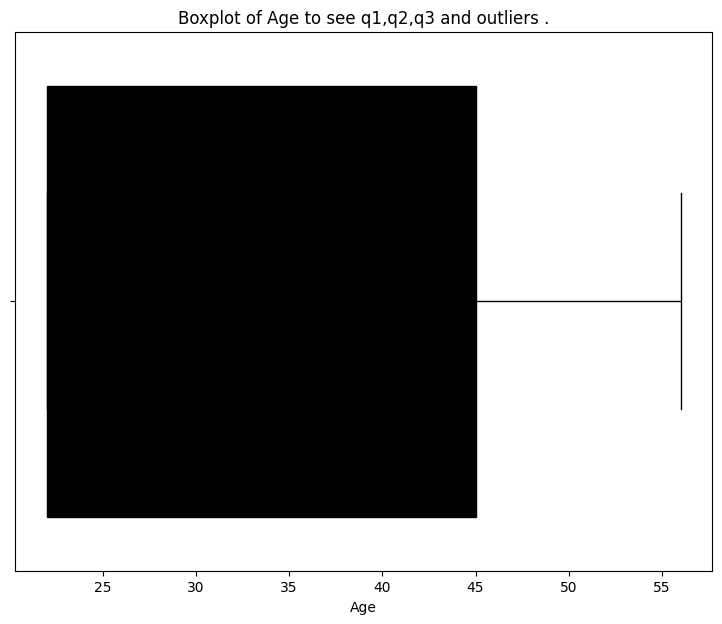

*******************
Skewness of Age : 0.5313540643816155
Value of mean+ 3standard_deviation for Age : 72.7310445165235


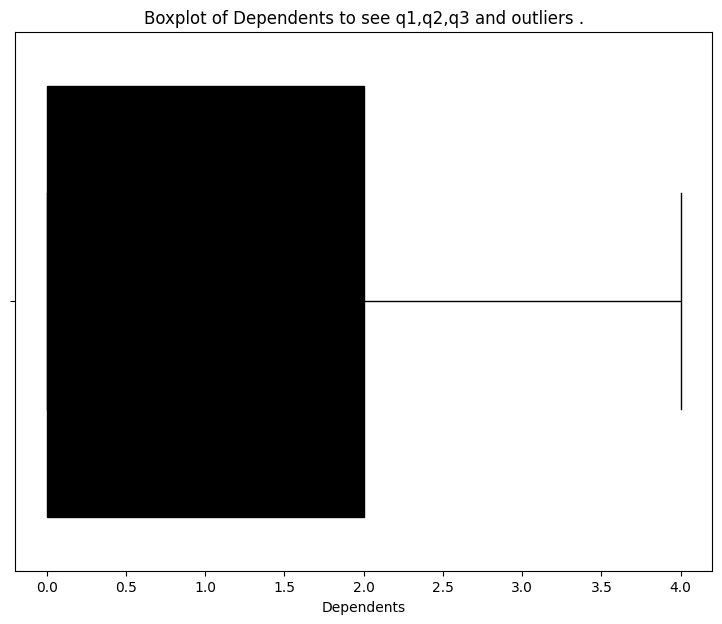

*******************
Skewness of Dependents : 0.8309292050781217
Value of mean+ 3standard_deviation for Dependents : 5.842598410717054


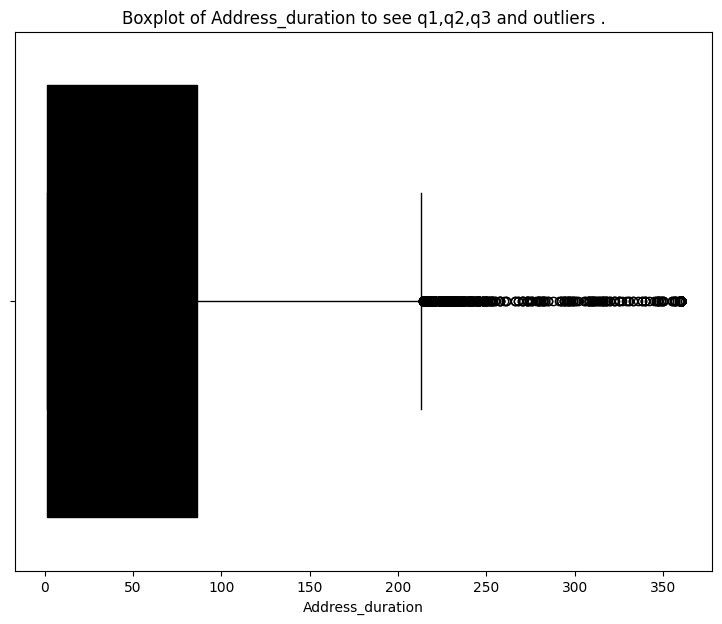

*******************
Skewness of Address_duration : 1.959473776006464
Value of mean+ 3standard_deviation for Address_duration : 323.6497405959431


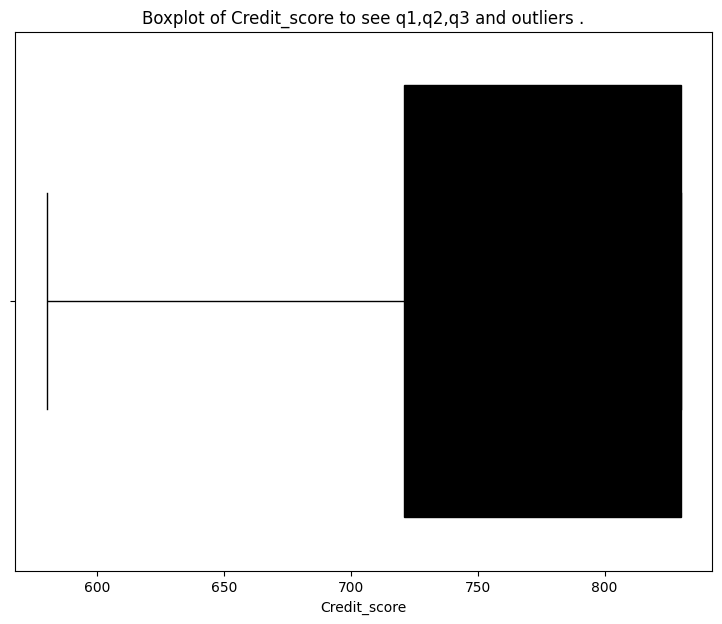

*******************
Skewness of Credit_score : -1.1011265951832494
Value of mean+ 3standard_deviation for Credit_score : 991.5440997403766


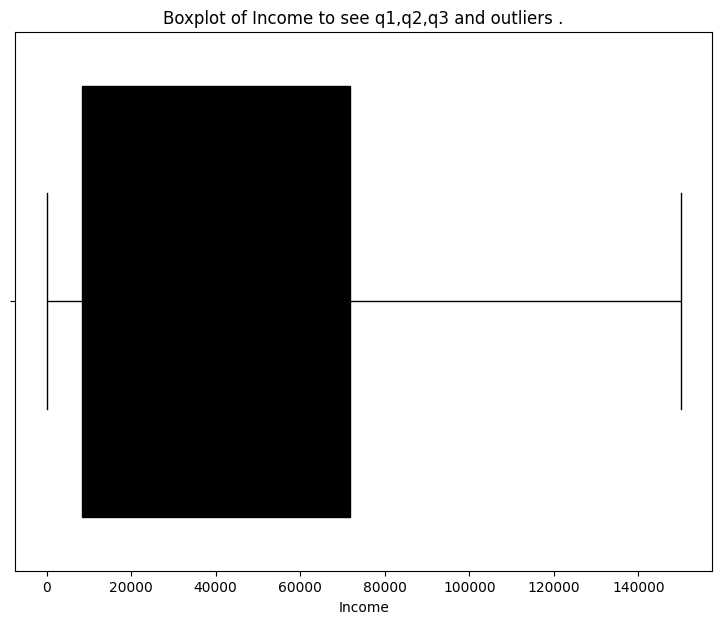

*******************
Skewness of Income : 0.9755174332957872
Value of mean+ 3standard_deviation for Income : 179939.16956317076


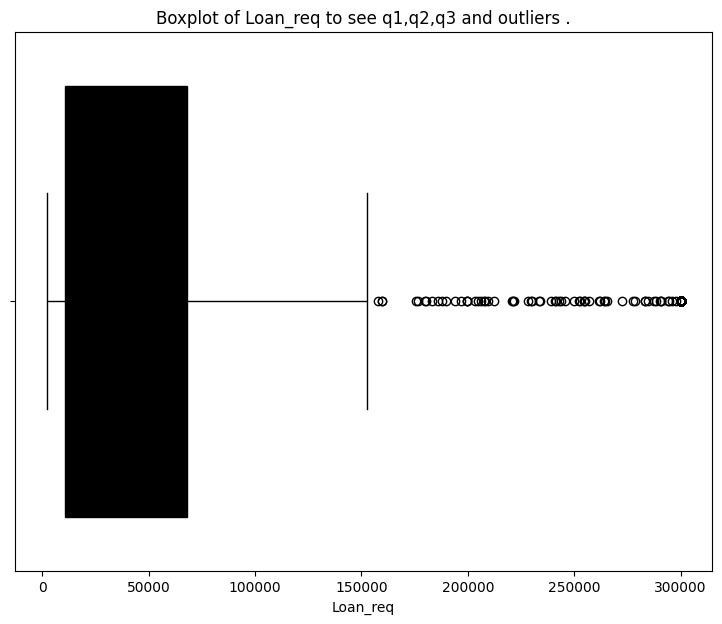

*******************
Skewness of Loan_req : 2.5208493637021308
Value of mean+ 3standard_deviation for Loan_req : 275912.0652918605


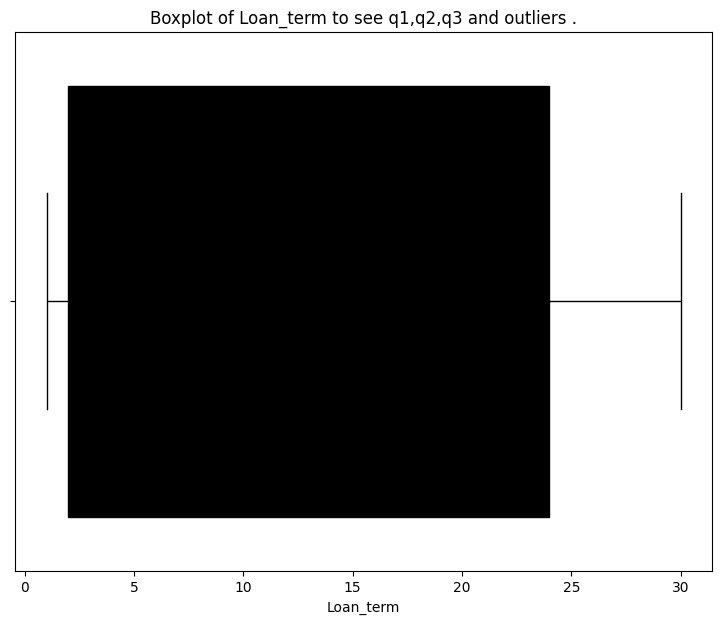

*******************
Skewness of Loan_term : 0.2115435376784588
Value of mean+ 3standard_deviation for Loan_term : 46.6182253714876


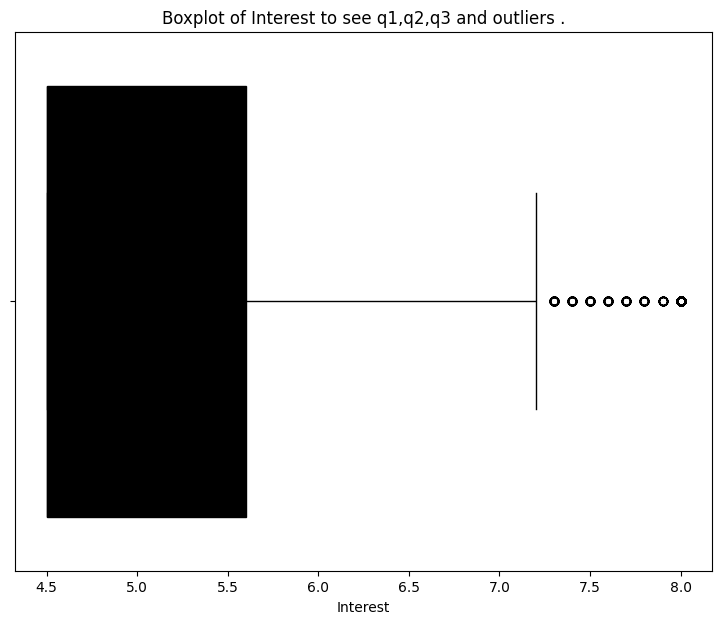

*******************
Skewness of Interest : 1.5255556087819055
Value of mean+ 3standard_deviation for Interest : 8.07096387408143


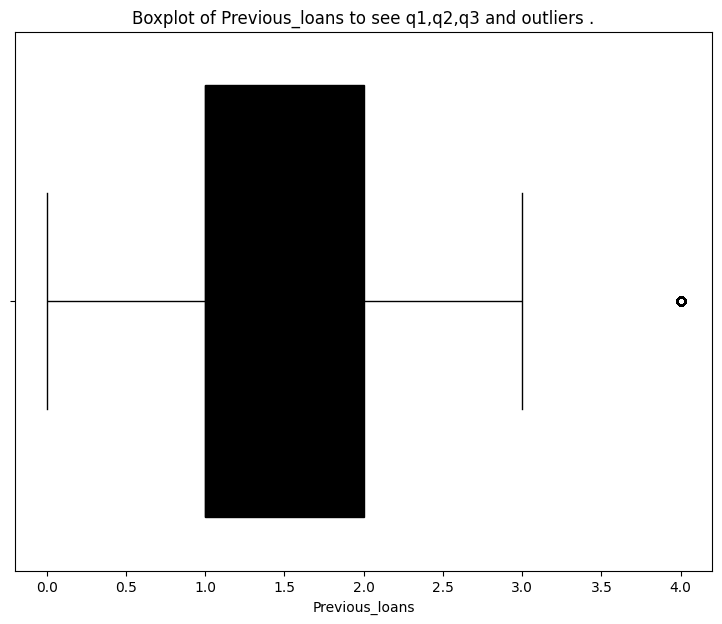

*******************
Skewness of Previous_loans : 0.49036196903207446
Value of mean+ 3standard_deviation for Previous_loans : 5.175888468009493


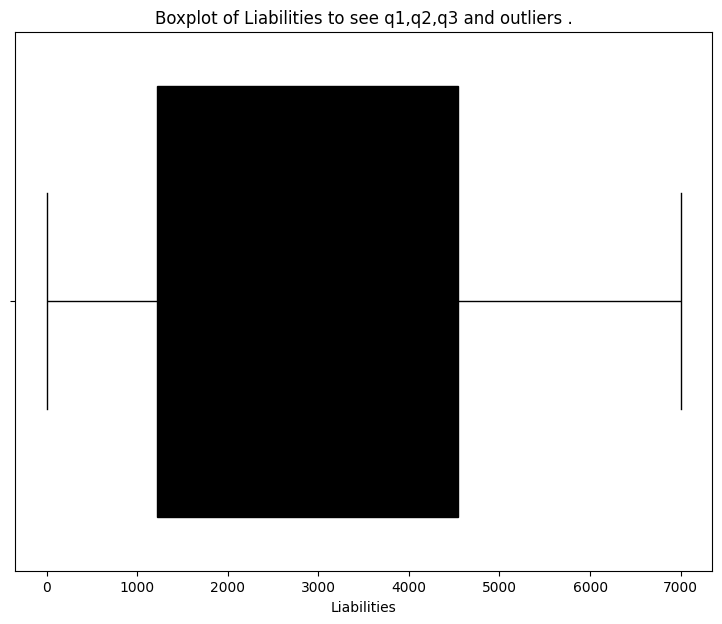

*******************
Skewness of Liabilities : 0.10173656555475502
Value of mean+ 3standard_deviation for Liabilities : 9320.188005126694


In [ ]:
for i in num_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(9,7))  ## Selecting the size of each plot .
  sns.boxplot(data=num_columns,x=i,color='black')
  plt.title(f"Boxplot of {i} to see q1,q2,q3 and outliers .")
  plt.show() ## show will show all the visuals .
  print("*******************")
  print(f"Skewness of {i} :", num_columns[i].skew())
  print(f"Value of mean+ 3standard_deviation for {i} :", num_columns[i].mean()+3*(num_columns[i].std()))

'Loan_req' and 'Address_duration' is slighty right skewed with few outliers and other columns are within outliers range .



In [ ]:
num_columns.columns ## columns function will show the name of all columns .

Index(['Age', 'Dependents', 'Address_duration', 'Credit_score', 'Income',
       'Loan_req', 'Loan_term', 'Interest', 'Previous_loans', 'Liabilities'],
      dtype='object')

In [ ]:
## Dropping some unnecessary columns with drop function .
cat_columns=fraud.drop(['Age','Dependents','Address_duration','Credit_score','Income',
       'Loan_req','Loan_term','Interest','Previous_loans','Liabilities'],axis=1)
cat_columns.head() ## head function will show us the top 5 rows .

,Occupation,Marital_status,Residence,Loan_purpose,Collateral,Application_behavior,Application_location,Changein_behavior,Transaction_time,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,Teacher,Divorced,Own,home,Yes,Rapid,Local,No,10:50,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,Engineer,Single,Rent,home,No,Rapid,Local,No,16:00,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,Clerk,Married,Live with Parents,home,No,Normal,Local,No,03:00,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,Unemployed,Single,Rent,personal,No,Rapid,Unusual,No,16:00,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,Software Developer,Single,Rent,home,No,Normal,Local,No,12:00,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


Creating a for loop with countplot to see total count of each columns distinct values and also their percentages in each plot's bottom .

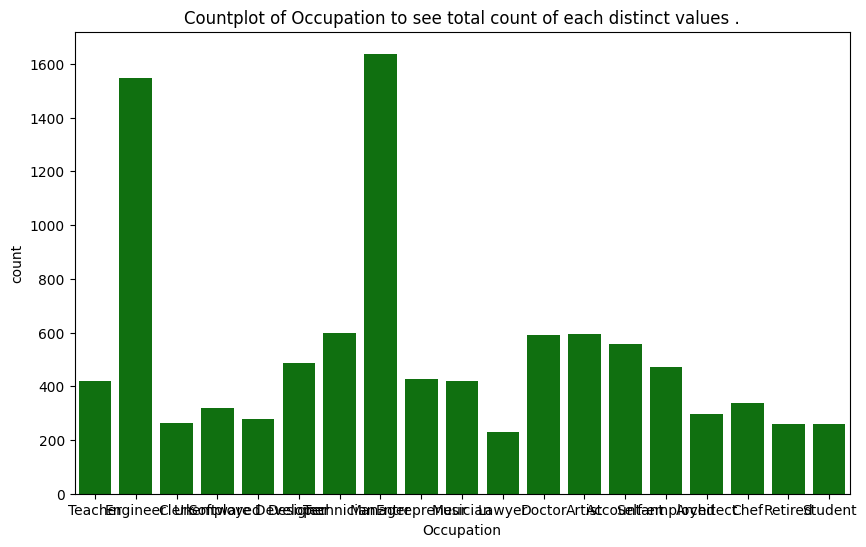

******************
Percentage of each distinct values in Occupation :
 Occupation
Manager               16.38
Engineer              15.46
Technician             5.97
Artist                 5.95
Doctor                 5.91
Accountant             5.58
Designer               4.88
Self-employed          4.73
Entrepreneur           4.27
Teacher                4.21
Musician               4.19
Chef                   3.38
Unemployed             3.18
Architect              2.98
Software Developer     2.79
Clerk                  2.63
Retired                2.61
Student                2.59
Lawyer                 2.31
Name: count, dtype: float64


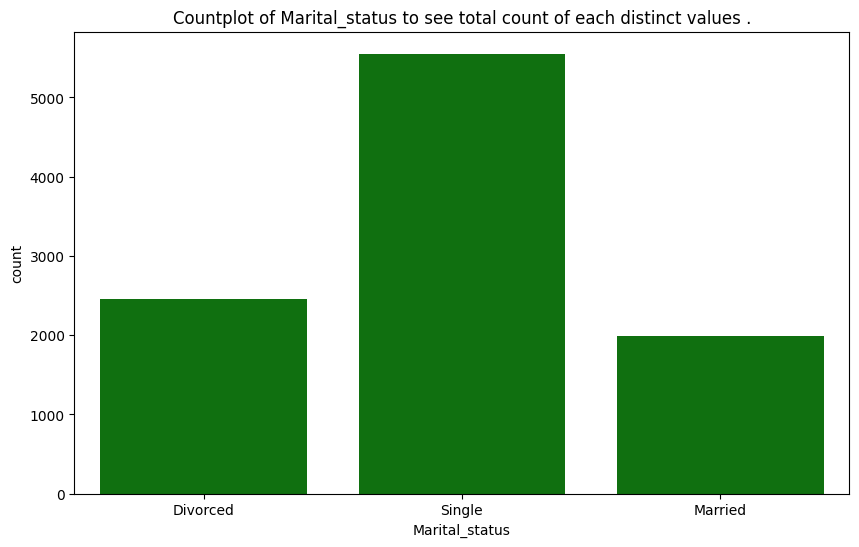

******************
Percentage of each distinct values in Marital_status :
 Marital_status
Single      55.51
Divorced    24.57
Married     19.92
Name: count, dtype: float64


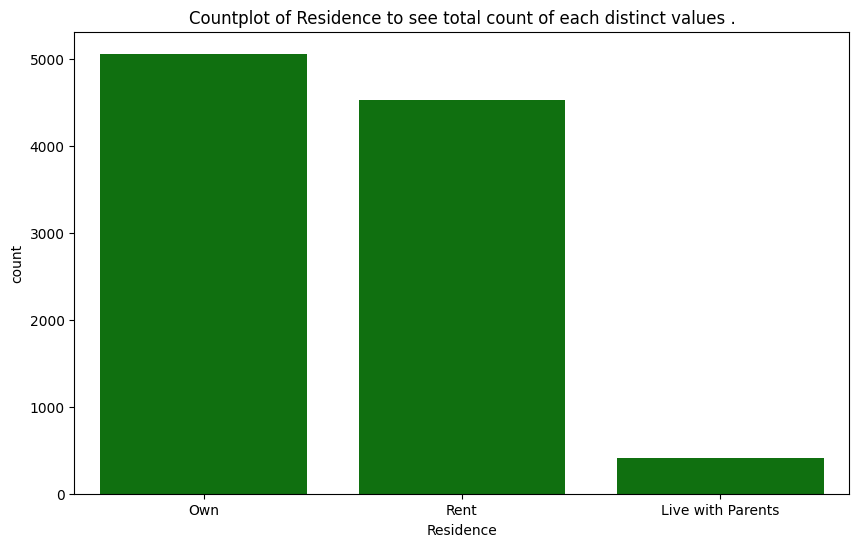

******************
Percentage of each distinct values in Residence :
 Residence
Own                  50.57
Rent                 45.28
Live with Parents     4.15
Name: count, dtype: float64


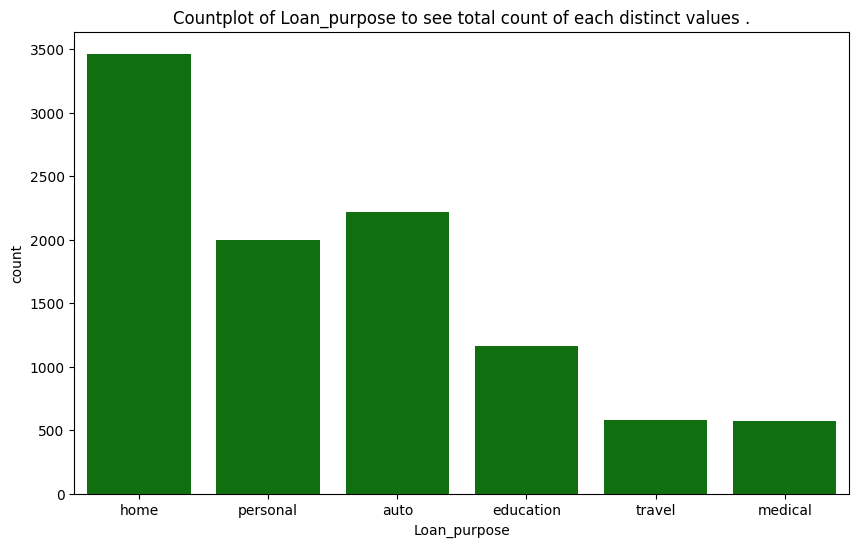

******************
Percentage of each distinct values in Loan_purpose :
 Loan_purpose
home         34.63
auto         22.21
personal     19.99
education    11.64
travel        5.79
medical       5.74
Name: count, dtype: float64


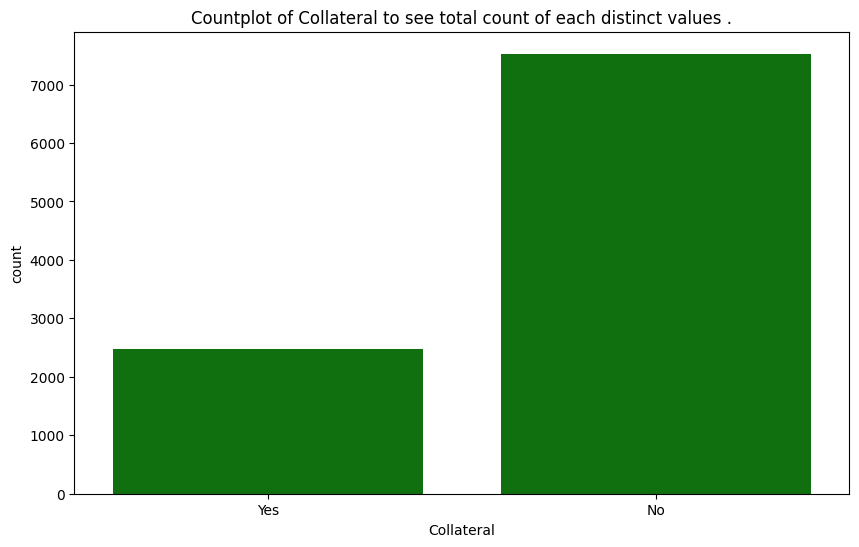

******************
Percentage of each distinct values in Collateral :
 Collateral
No     75.28
Yes    24.72
Name: count, dtype: float64


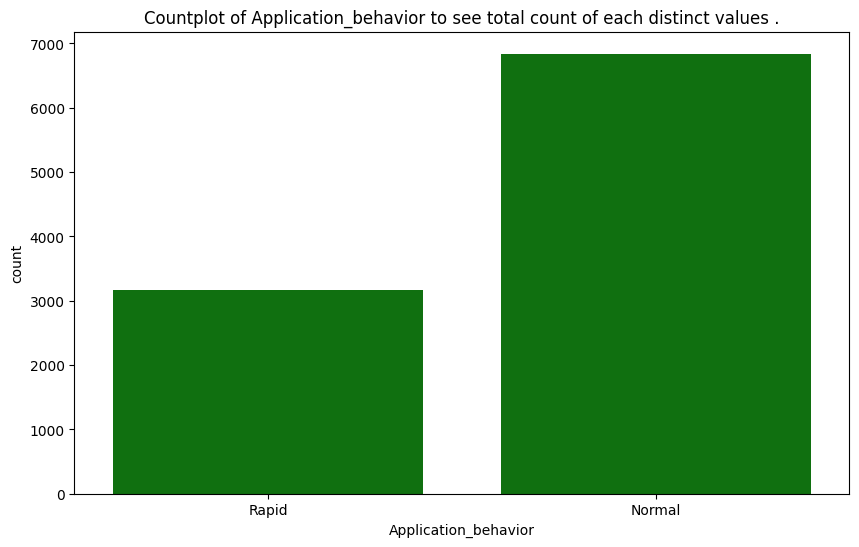

******************
Percentage of each distinct values in Application_behavior :
 Application_behavior
Normal    68.41
Rapid     31.59
Name: count, dtype: float64


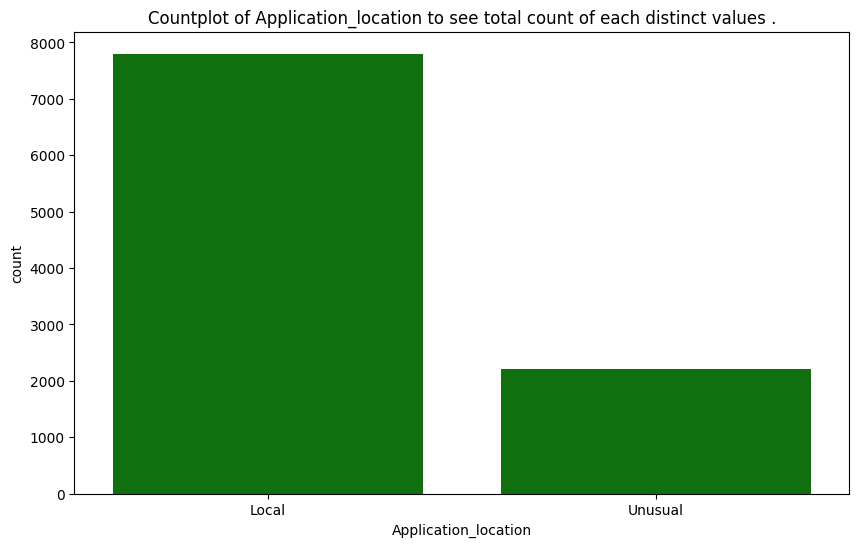

******************
Percentage of each distinct values in Application_location :
 Application_location
Local      78.0
Unusual    22.0
Name: count, dtype: float64


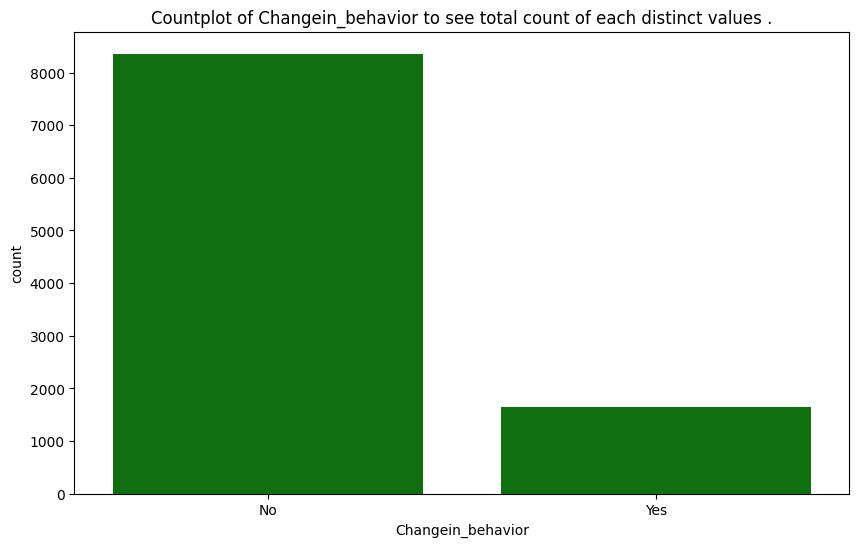

******************
Percentage of each distinct values in Changein_behavior :
 Changein_behavior
No     83.61
Yes    16.39
Name: count, dtype: float64


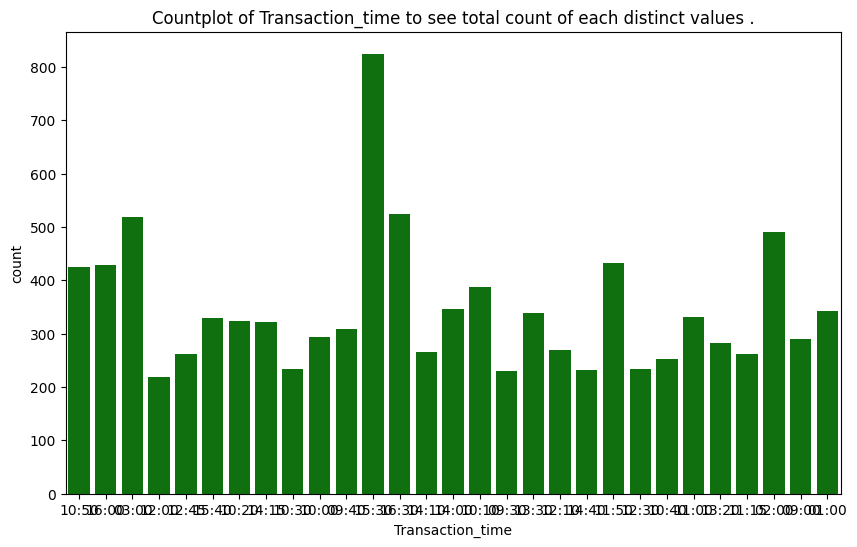

******************
Percentage of each distinct values in Transaction_time :
 Transaction_time
15:30    8.25
16:30    5.25
03:00    5.19
02:00    4.90
11:50    4.32
16:00    4.29
10:50    4.25
10:10    3.88
14:00    3.46
01:00    3.43
13:30    3.39
11:00    3.32
15:40    3.30
10:20    3.24
14:15    3.22
09:40    3.08
10:00    2.94
09:00    2.90
13:20    2.83
12:10    2.70
14:10    2.66
12:45    2.61
11:15    2.61
10:40    2.53
12:30    2.33
10:30    2.33
14:40    2.32
09:30    2.29
12:00    2.18
Name: count, dtype: float64


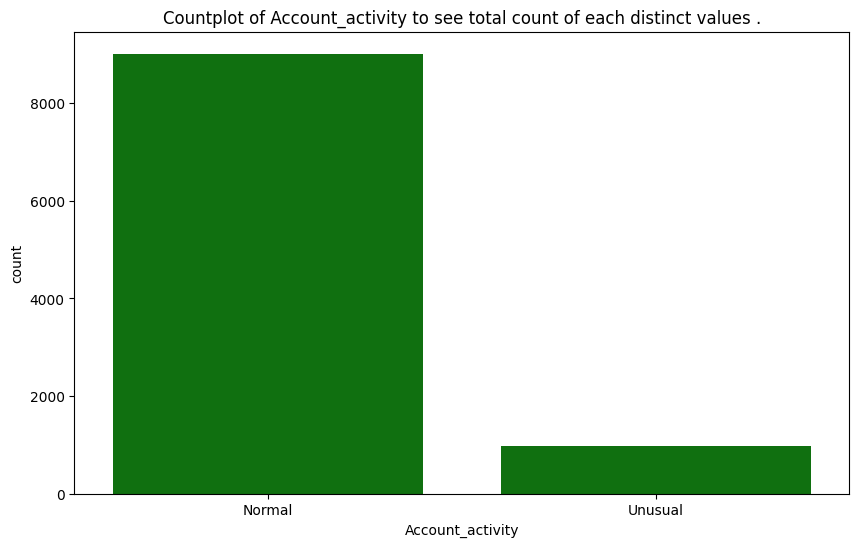

******************
Percentage of each distinct values in Account_activity :
 Account_activity
Normal     90.15
Unusual     9.85
Name: count, dtype: float64


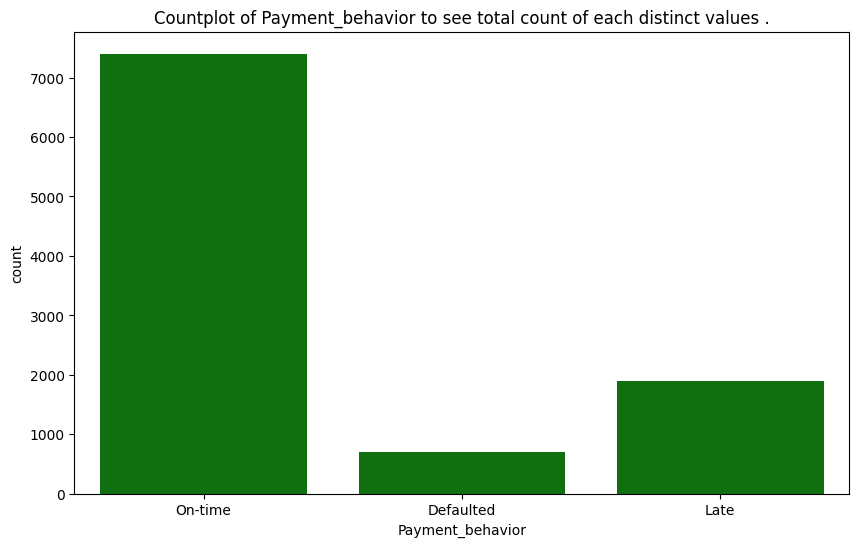

******************
Percentage of each distinct values in Payment_behavior :
 Payment_behavior
On-time      74.03
Late         18.91
Defaulted     7.06
Name: count, dtype: float64


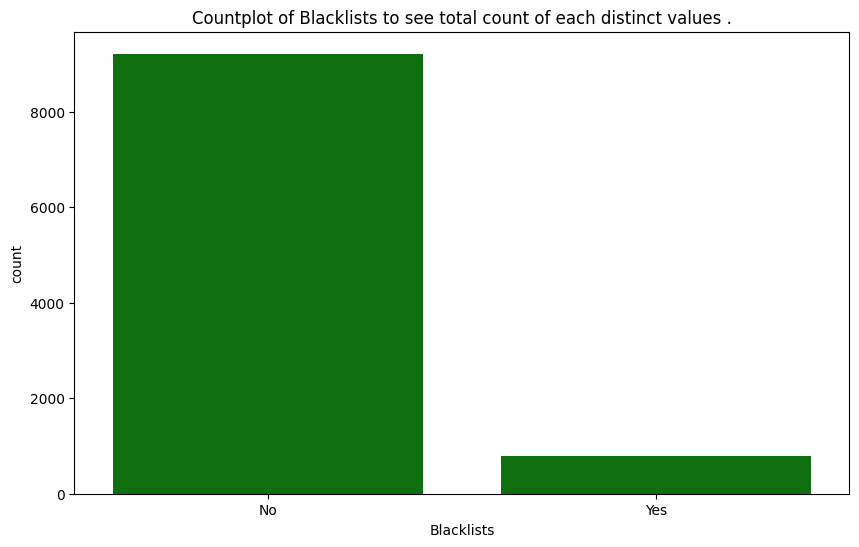

******************
Percentage of each distinct values in Blacklists :
 Blacklists
No     92.1
Yes     7.9
Name: count, dtype: float64


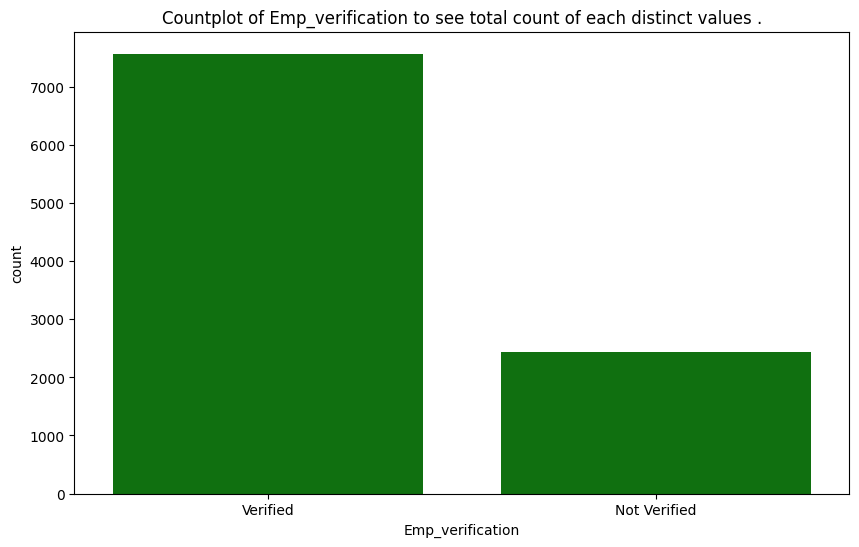

******************
Percentage of each distinct values in Emp_verification :
 Emp_verification
Verified        75.67
Not Verified    24.33
Name: count, dtype: float64


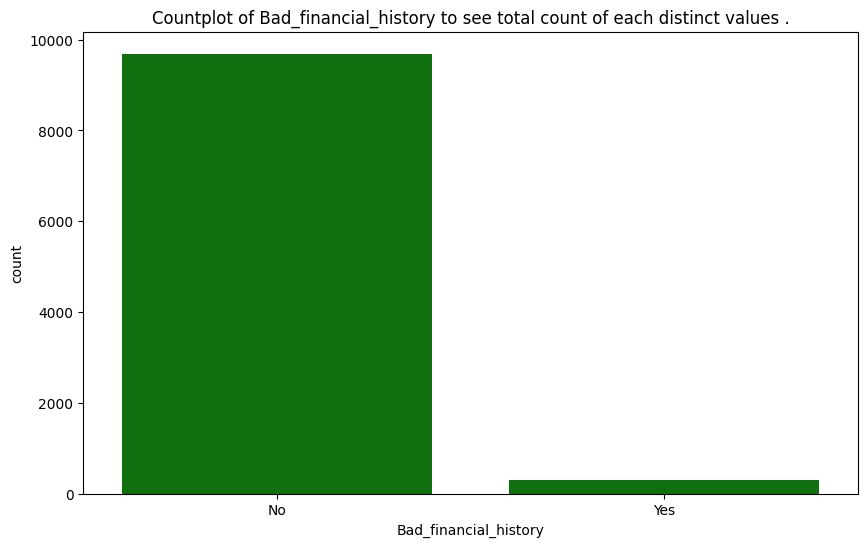

******************
Percentage of each distinct values in Bad_financial_history :
 Bad_financial_history
No     96.93
Yes     3.07
Name: count, dtype: float64


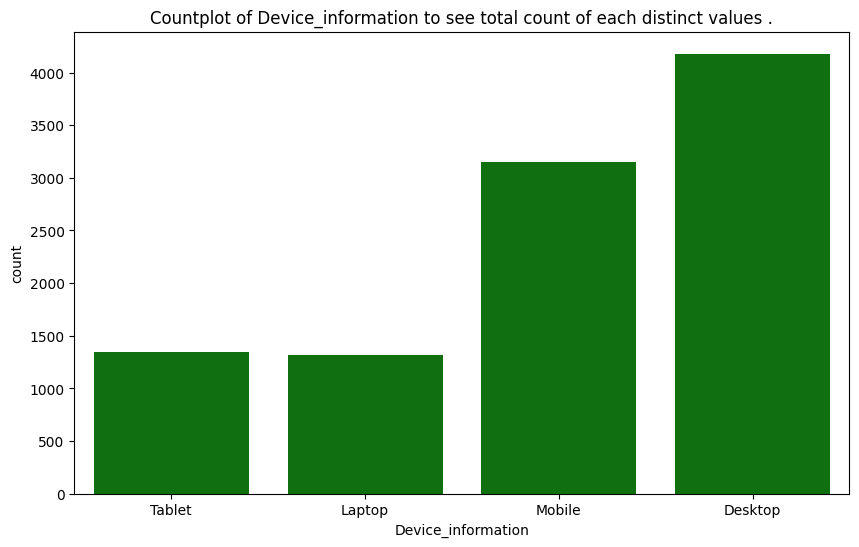

******************
Percentage of each distinct values in Device_information :
 Device_information
Desktop    41.80
Mobile     31.51
Tablet     13.48
Laptop     13.21
Name: count, dtype: float64


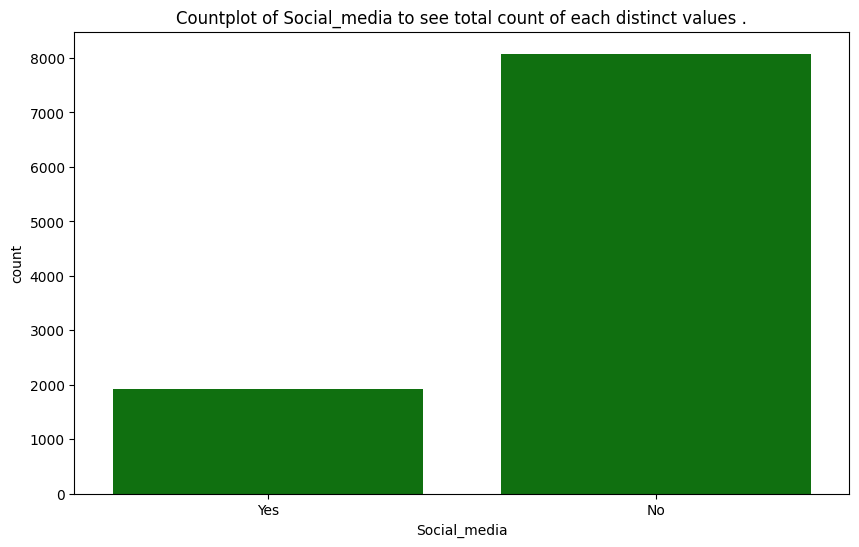

******************
Percentage of each distinct values in Social_media :
 Social_media
No     80.8
Yes    19.2
Name: count, dtype: float64


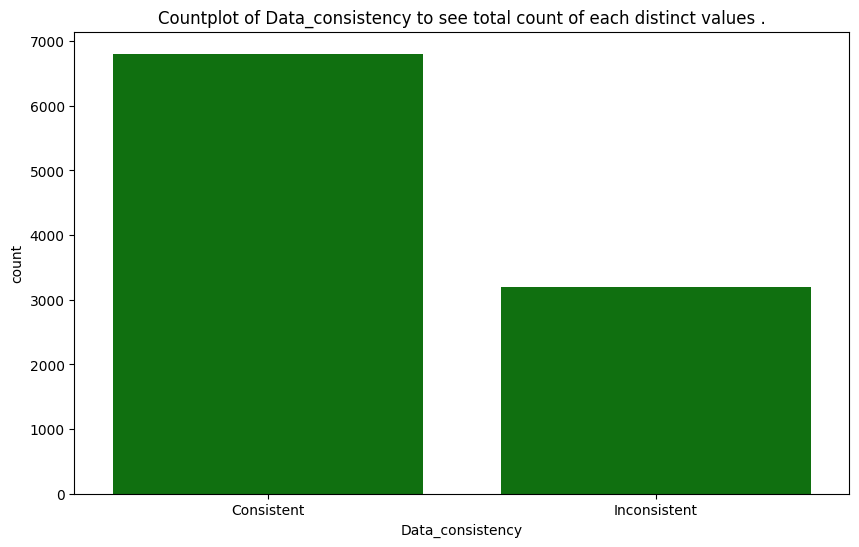

******************
Percentage of each distinct values in Data_consistency :
 Data_consistency
Consistent      68.07
Inconsistent    31.93
Name: count, dtype: float64


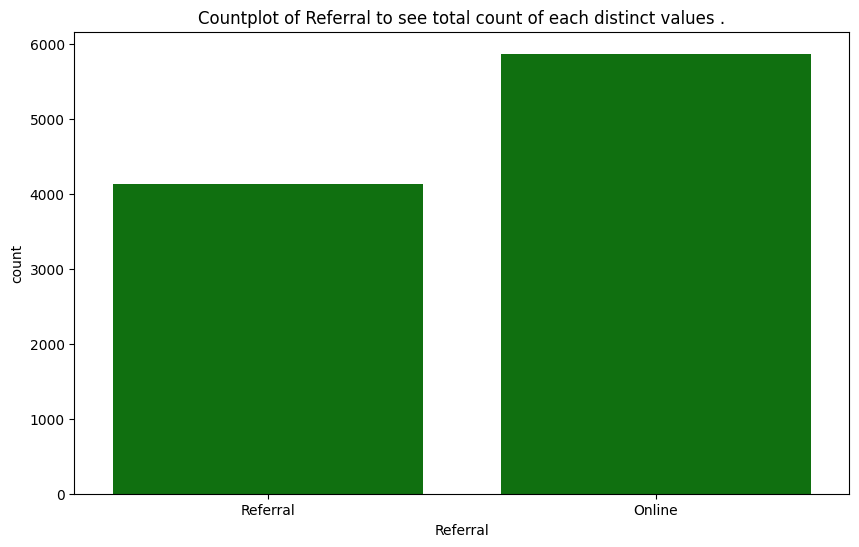

******************
Percentage of each distinct values in Referral :
 Referral
Online      58.72
Referral    41.28
Name: count, dtype: float64


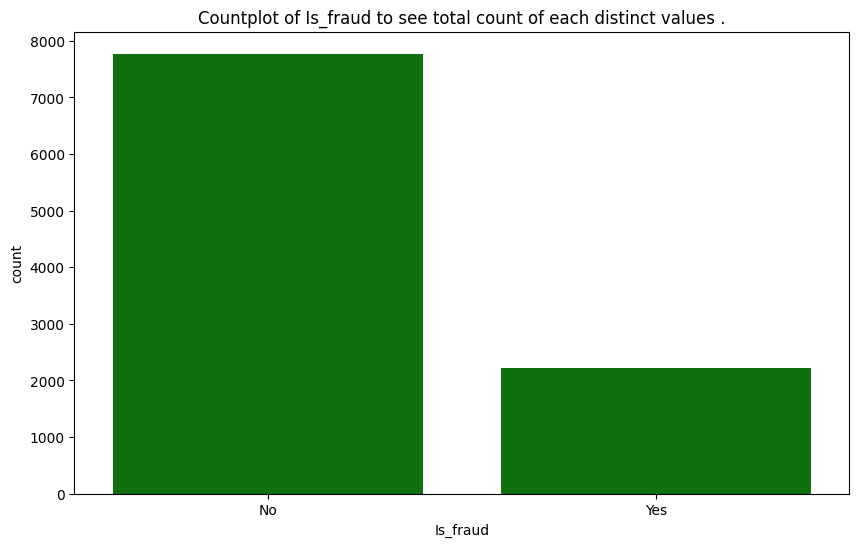

******************
Percentage of each distinct values in Is_fraud :
 Is_fraud
No     77.74
Yes    22.26
Name: count, dtype: float64


In [ ]:
for i in cat_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(10,6)) ## Selecting the size of each plot .
  sns.countplot(data=cat_columns,x=i,color='green')
  plt.title(f"Countplot of {i} to see total count of each distinct values .")
  plt.show()  ## show will show all the visuals .
  print("******************")
  print(f"Percentage of each distinct values in {i} :\n", (cat_columns[i].value_counts()*100)/len(cat_columns[i]))

**Important insights :**    

1. 55.51% applicants are single and only 19.92% are
married .

2. 50.57% applicants has their own house .

3. 34.63% applications are for Home loans and close to 11.50% for travel and medical .

4. 75.28% applicants does not have any collaterals , 31.59% applicants application behavior is rapid .

5. 22% applicants has unusual application_location and 9.85% has unusual account activities .

6. 7.06% payments were defaulted and 18.91% payments were late .

7. 24.33% applicant's employee verification is not verified and 7.90% applicants were blacklisted .

8. 3.07% applicants has bad financial history .

9. 19.2% applicants has social media accounts and 31.93% applications has some kind of inconsistent data .

10. 22.26% applications were fraud in overall data .



In [ ]:
## Creating a list of columns which has only two distinct values .
two_values=['Collateral','Application_behavior','Application_location','Changein_behavior','Account_activity','Blacklists','Emp_verification',
            'Bad_financial_history','Social_media','Data_consistency','Referral','Is_fraud']

In [ ]:
occupations=fraud.Occupation.value_counts() ## Using value_counts to see total count of each distinct values in a column .
## Barplot to see the total count of each distint values .
fig=px.bar(occupations,y='count',width=850,height=650,title='Barplot of Occupations')
fig.show()

Manager is the highest in all occupations with total count of 1638 and Lawyer is the lowest with 231 .

In [ ]:
## Boxplot to see q1,q2 or median, q3, min, max and outliers .
fig=px.box(fraud,y='Income',color='Occupation',width=950,
           height=750,title='Boxplot of Income by different Occupations')
fig.show()

Self_employed's earns the least median income and Entrepreneur earns the highest .

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [ ]:
## Group by Occupation with avg Income and Loan_req .
occupation_others=fraud[['Occupation','Income','Loan_req']].groupby('Occupation').mean('Income','Loan_req').sort_values('Income',ascending=False)
occupation_others

,Income,Loan_req
Occupation,,
Entrepreneur,67580.468384,91075.444965
Manager,63450.260684,91140.175824
Doctor,62215.189509,84834.182741
Lawyer,55604.848485,61862.593074
Architect,54825.107383,64099.325503
Teacher,51960.598575,60011.140143
Chef,50881.523669,55998.630178
Retired,46503.885057,52961.609195
Software Developer,41685.039427,47482.942652


In [ ]:
## Barplot to see the total count of each distint values .
fig=px.bar(occupation_others,y='Income',width=850,height=700,
           title='Barplot to see each occupations average income')
fig.show()

In [ ]:
## Barplot to see the total count of each distint values .
fig=px.bar(occupation_others,y='Loan_req',width=850,height=700,
           title='Barplot to see each occupations average Loan amount requested')
fig.show()

**Occupations avg_income and Loan_req :**    

Entrepreneur and Managers earns the highest avg_income and also they have requested for the highest amount of loan .

Designer and Self_employed earned the least and they requested for least amount of Loan amount .

In [ ]:
## Group by Loan_purpose with avg Loan_req and Loan_term .
Loan_purpose_others=fraud[['Loan_purpose','Loan_req','Loan_term']].groupby('Loan_purpose').mean('Loan_req','Loan_term').sort_values('Loan_req',ascending=False)
Loan_purpose_others

,Loan_req,Loan_term
Loan_purpose,,
home,86743.828761,19.054288
medical,56858.782230,14.501742
education,49617.032646,12.907216
auto,42719.024764,11.896893
travel,38181.735751,9.739206
personal,32225.078039,8.545273


In [ ]:
## Barplot to see the total count of each distint values .
fig=px.bar(Loan_purpose_others,y='Loan_req',width=850,height=700,
           title='Barplot to see Loan_purpose and the loan amount requested')
fig.show()

**Loan_purpose and Loan_req :**    

Home_loan requested the most amount (86.74k) followed by Medical loan (56.85k) and personal loan requested for 32.22k on an average which is the lowest .

In [ ]:
## Barplot to see the total count of each distint values .
fig=px.bar(Loan_purpose_others,y='Loan_term',width=850,height=700,
           title='Barplot to see Loan_purpose and the mean loan term')
fig.show()

**Loan_term and Loan purpose :**    

Almost 19 years is the avearge term in home loan which is highest and close to 8 and a half years in personal loan which is lowest .


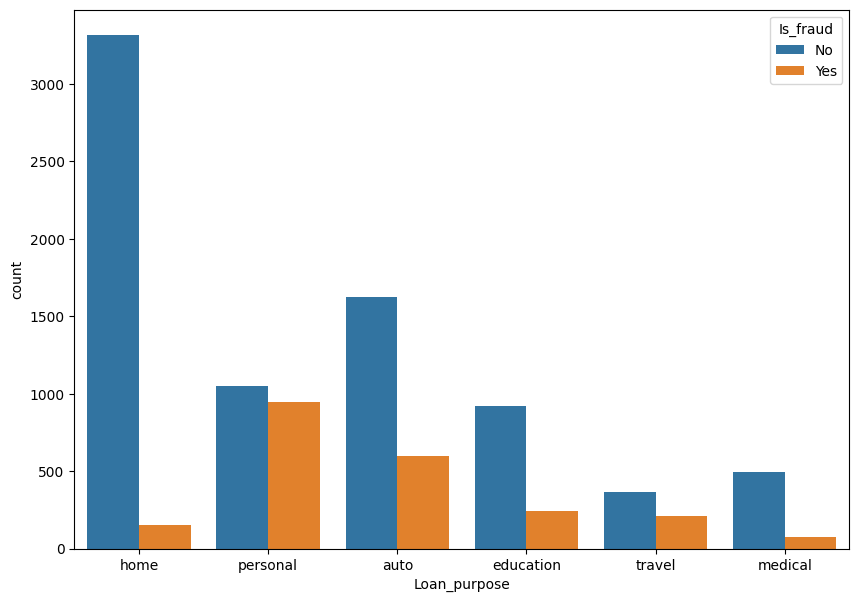

In [ ]:
## Creating a countplot which shows fraud and not fraud count in 'Loan_purpose' .
plt.figure(figsize=(10,7))
sns.countplot(data=fraud,x='Loan_purpose',hue='Is_fraud')
plt.show()

**Loan purpose and fraud counts :**    

Home loan has the highest number and highest ration of legit applications .

Personal loan has the highest number of frauds and the ratio is almost half , followed by auto loan ,

Medical_loan has lowest number of frauds .

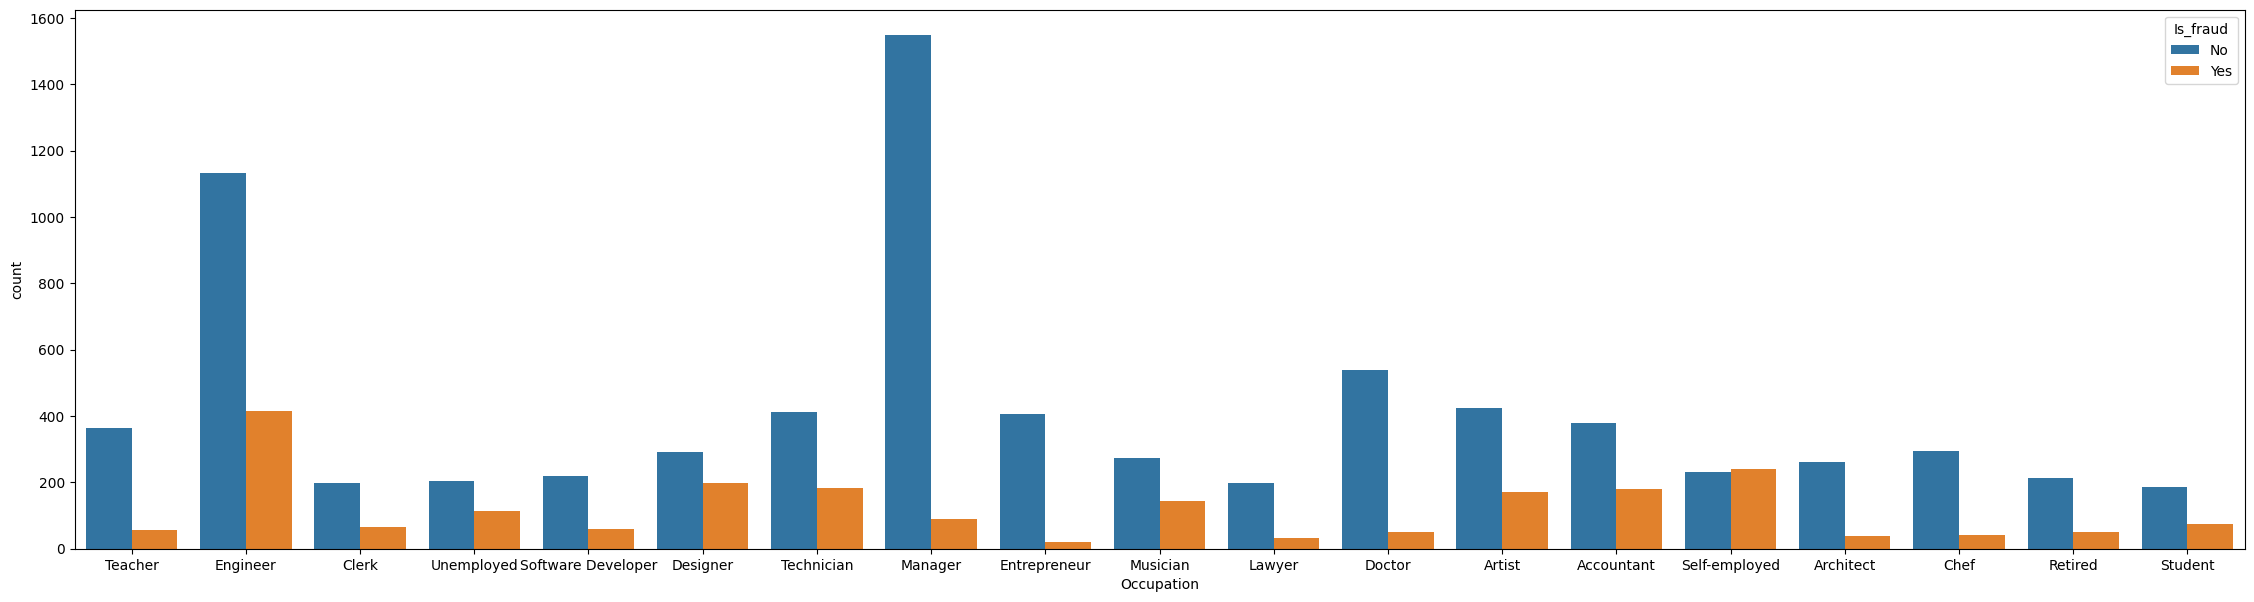

In [ ]:
## Creating a countplot which shows fraud and not fraud count in 'Occupation' .
plt.figure(figsize=(28,7))
sns.countplot(data=fraud,x='Occupation',hue='Is_fraud')
plt.show()

**Occupation and Frauds :**    

Managers are the most secure occupation with highest number of legit applications .

Self_employed people's fraud ratio is higher than legit .

Engineer shows the highest no of Frauds and Entrepreneur shows the lowest .

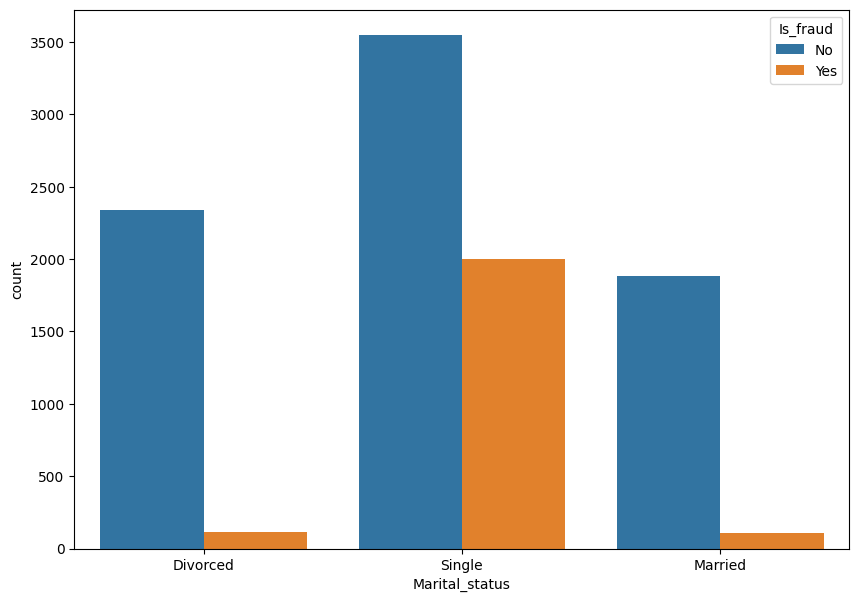

In [ ]:
## Creating a countplot which shows fraud and not fraud count in 'Marital_status' .
plt.figure(figsize=(10,7))
sns.countplot(data=fraud,x='Marital_status',hue='Is_fraud')
plt.show()

**Marital_status and Fraud :**    

Single people are mostly doing this Frauds and Divorced people has the lowest ratio followed by married .

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [ ]:
two_values

['Collateral',
 'Application_behavior',
 'Application_location',
 'Changein_behavior',
 'Account_activity',
 'Blacklists',
 'Emp_verification',
 'Bad_financial_history',
 'Social_media',
 'Data_consistency',
 'Referral',
 'Is_fraud']

In [ ]:
## Created a new dataset with columns which has only two distinct values .
two_v=fraud[['Collateral','Application_behavior','Application_location',
 'Changein_behavior','Account_activity','Blacklists','Emp_verification',
 'Bad_financial_history','Social_media','Data_consistency','Referral','Is_fraud']]
two_v.head() ## head function will show us the top 5 rows .

,Collateral,Application_behavior,Application_location,Changein_behavior,Account_activity,Blacklists,Emp_verification,Bad_financial_history,Social_media,Data_consistency,Referral,Is_fraud
0,Yes,Rapid,Local,No,Normal,No,Verified,No,Yes,Consistent,Referral,No
1,No,Rapid,Local,No,Normal,No,Verified,No,No,Consistent,Online,No
2,No,Normal,Local,No,Normal,Yes,Verified,No,No,Consistent,Referral,No
3,No,Rapid,Unusual,No,Unusual,No,Not Verified,Yes,No,Inconsistent,Online,Yes
4,No,Normal,Local,No,Normal,No,Verified,No,No,Consistent,Online,No


In [ ]:
## Using np.where function in all those columns which has only two distinct values and converting those values into 0 and 1 .
fraud['Collateral']=np.where(fraud['Collateral']=='Yes',1,0)
fraud['Application_behavior']=np.where(fraud['Application_behavior']=='Rapid',1,0)
fraud['Application_location']=np.where(fraud['Application_location']=='Local',0,1)
fraud['Changein_behavior']=np.where(fraud['Changein_behavior']=='Yes',1,0)
fraud['Account_activity']=np.where(fraud['Account_activity']=='Unusual',1,0)
fraud['Blacklists']=np.where(fraud['Blacklists']=='Yes',1,0)
fraud['Emp_verification']=np.where(fraud['Emp_verification']=='Verified',1,0)
fraud['Bad_financial_history']=np.where(fraud['Bad_financial_history']=='Yes',1,0)
fraud['Social_media']=np.where(fraud['Social_media']=='Yes',1,0)
fraud['Data_consistency']=np.where(fraud['Data_consistency']=='Consistent',0,1)
fraud['Referral']=np.where(fraud['Referral']=='Referral',1,0)
fraud['Is_fraud']=np.where(fraud['Is_fraud']=='Yes',1,0)

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Occupation,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,0,On-time,0,1,0,Tablet,1,0,1,0
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,0,On-time,0,1,0,Laptop,0,0,0,0
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,0,On-time,1,1,0,Laptop,0,0,1,0
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,1,Defaulted,0,0,1,Mobile,0,1,0,1
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,0,On-time,0,1,0,Laptop,0,0,0,0


In [ ]:
fraud.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Occupation             10000 non-null  object 
 2   Marital_status         10000 non-null  object 
 3   Dependents             10000 non-null  int64  
 4   Residence              10000 non-null  object 
 5   Address_duration       10000 non-null  int64  
 6   Credit_score           10000 non-null  int64  
 7   Income                 10000 non-null  int64  
 8   Loan_req               10000 non-null  int64  
 9   Loan_term              10000 non-null  int64  
 10  Loan_purpose           10000 non-null  object 
 11  Collateral             10000 non-null  int64  
 12  Interest               10000 non-null  float64
 13  Previous_loans         10000 non-null  int64  
 14  Liabilities            10000 non-null  int64  
 15  App

In [ ]:
fraud=fraud.drop(['Occupation','Transaction_time'],axis=1) ## Dropping some unnecessary columns with drop function .
fraud.head() ## head function will show us the top 5 rows .

,Age,Marital_status,Dependents,Residence,Address_duration,Credit_score,Income,Loan_req,Loan_term,Loan_purpose,...,Account_activity,Payment_behavior,Blacklists,Emp_verification,Bad_financial_history,Device_information,Social_media,Data_consistency,Referral,Is_fraud
0,56,Divorced,4,Own,1,827,52033,300000,25,home,...,0,On-time,0,1,0,Tablet,1,0,1,0
1,40,Single,0,Rent,1,830,42893,8105,3,home,...,0,On-time,0,1,0,Laptop,0,0,0,0
2,25,Married,0,Live with Parents,360,809,141233,75734,19,home,...,0,On-time,1,1,0,Laptop,0,0,1,0
3,34,Single,0,Rent,92,630,9217,2000,1,personal,...,1,Defaulted,0,0,1,Mobile,0,1,0,1
4,47,Single,0,Rent,26,733,47979,67767,1,home,...,0,On-time,0,1,0,Laptop,0,0,0,0


In [ ]:
fraud.dtypes ## dtypes will show us the data types of all columns .

Age                        int64
Marital_status            object
Dependents                 int64
Residence                 object
Address_duration           int64
Credit_score               int64
Income                     int64
Loan_req                   int64
Loan_term                  int64
Loan_purpose              object
Collateral                 int64
Interest                 float64
Previous_loans             int64
Liabilities                int64
Application_behavior       int64
Application_location       int64
Changein_behavior          int64
Account_activity           int64
Payment_behavior          object
Blacklists                 int64
Emp_verification           int64
Bad_financial_history      int64
Device_information        object
Social_media               int64
Data_consistency           int64
Referral                   int64
Is_fraud                   int64
dtype: object

In [ ]:
## pd.get_dummies will convert all the categorical columns into numeric ones .
fraud=pd.get_dummies(fraud,columns=['Device_information','Payment_behavior','Loan_purpose','Residence','Marital_status'],dtype=int)

In [ ]:
fraud.head() ## head function will show us the top 5 rows .

,Age,Dependents,Address_duration,Credit_score,Income,Loan_req,Loan_term,Collateral,Interest,Previous_loans,...,Loan_purpose_home,Loan_purpose_medical,Loan_purpose_personal,Loan_purpose_travel,Residence_Live with Parents,Residence_Own,Residence_Rent,Marital_status_Divorced,Marital_status_Married,Marital_status_Single
0,56,4,1,827,52033,300000,25,1,4.5,1,...,1,0,0,0,0,1,0,1,0,0
1,40,0,1,830,42893,8105,3,0,5.4,2,...,1,0,0,0,0,0,1,0,0,1
2,25,0,360,809,141233,75734,19,0,4.6,3,...,1,0,0,0,1,0,0,0,1,0
3,34,0,92,630,9217,2000,1,0,4.7,1,...,0,0,1,0,0,0,1,0,0,1
4,47,0,26,733,47979,67767,1,0,8.0,1,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
fraud.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10000 non-null  int64  
 1   Dependents                   10000 non-null  int64  
 2   Address_duration             10000 non-null  int64  
 3   Credit_score                 10000 non-null  int64  
 4   Income                       10000 non-null  int64  
 5   Loan_req                     10000 non-null  int64  
 6   Loan_term                    10000 non-null  int64  
 7   Collateral                   10000 non-null  int64  
 8   Interest                     10000 non-null  float64
 9   Previous_loans               10000 non-null  int64  
 10  Liabilities                  10000 non-null  int64  
 11  Application_behavior         10000 non-null  int64  
 12  Application_location         10000 non-null  int64  
 13  Changein_behavior

In [ ]:
X=fraud.drop(['Is_fraud'],axis=1) ## Creating X dataset for all the indipendent columns .
y=fraud['Is_fraud']   ## y is the target variable .

In [ ]:
## Importing statsmodels.api library to see the p_values .
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary()) ## summary will show the p_value and others .

Optimization terminated successfully.
         Current function value: 0.336005
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Is_fraud   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9964
Method:                           MLE   Df Model:                           35
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.3662
Time:                        06:34:22   Log-Likelihood:                -3360.1
converged:                       True   LL-Null:                       -5301.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0210      0.003     -6.262      0.000   

statsmodels.api shows us the p_value of each indipendent column .

p_value shows whether the column is significant or not . If the p_value is less than 0.05 then the column is significant otherwise it is not that significant .

All the columns after referral has p_value of 1 or giving us nan . so i need to delete all those columns where the p_value is higher or which i find not soo significant after data analysis .

In [ ]:
fraud.columns ## columns function will show the name of all columns .

Index(['Age', 'Dependents', 'Address_duration', 'Credit_score', 'Income',
       'Loan_req', 'Loan_term', 'Collateral', 'Interest', 'Previous_loans',
       'Liabilities', 'Application_behavior', 'Application_location',
       'Changein_behavior', 'Account_activity', 'Blacklists',
       'Emp_verification', 'Bad_financial_history', 'Social_media',
       'Data_consistency', 'Referral', 'Is_fraud',
       'Device_information_Desktop', 'Device_information_Laptop',
       'Device_information_Mobile', 'Device_information_Tablet',
       'Payment_behavior_Defaulted', 'Payment_behavior_Late',
       'Payment_behavior_On-time', 'Loan_purpose_auto',
       'Loan_purpose_education', 'Loan_purpose_home', 'Loan_purpose_medical',
       'Loan_purpose_personal', 'Loan_purpose_travel',
       'Residence_Live with Parents', 'Residence_Own', 'Residence_Rent',
       'Marital_status_Divorced', 'Marital_status_Married',
       'Marital_status_Single'],
      dtype='object')

In [ ]:
## Dropping some unnecessary columns with drop function because the p_value is higher in all of these columns .
fraud=fraud.drop(['Device_information_Desktop', 'Device_information_Laptop',
       'Device_information_Mobile', 'Device_information_Tablet',
       'Payment_behavior_Defaulted', 'Payment_behavior_Late',
       'Payment_behavior_On-time', 'Loan_purpose_auto',
       'Loan_purpose_education', 'Loan_purpose_home', 'Loan_purpose_medical',
       'Loan_purpose_personal', 'Loan_purpose_travel',
       'Residence_Live with Parents', 'Residence_Own', 'Residence_Rent',
       'Marital_status_Divorced', 'Marital_status_Married',
       'Marital_status_Single','Bad_financial_history','Interest','Application_behavior'],axis=1)
fraud.head() ## head function will show us the top 5 rows .

,Age,Dependents,Address_duration,Credit_score,Income,Loan_req,Loan_term,Collateral,Previous_loans,Liabilities,Application_location,Changein_behavior,Account_activity,Blacklists,Emp_verification,Social_media,Data_consistency,Referral,Is_fraud
0,56,4,1,827,52033,300000,25,1,1,7000,0,0,0,0,1,1,0,1,0
1,40,0,1,830,42893,8105,3,0,2,4244,0,0,0,0,1,0,0,0,0
2,25,0,360,809,141233,75734,19,0,3,0,0,0,0,1,1,0,0,1,0
3,34,0,92,630,9217,2000,1,0,1,4373,1,0,1,0,0,0,1,0,1
4,47,0,26,733,47979,67767,1,0,1,2499,0,0,0,0,1,0,0,0,0


In [ ]:
X=fraud.drop(['Is_fraud'],axis=1) ## Creating X dataset for all the indipendent columns .
y=fraud['Is_fraud']   ## y is the target variable .

In [ ]:
from sklearn.model_selection import train_test_split  ## train_test_split will split the dataset into training and testing .
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=19) ## test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .
print(X_train.shape) ## shape function will show total no of rows and columns .
print(y_test.shape)  ## shape function will show total no of rows and columns .

(7000, 18)
(3000,)


In [ ]:
from sklearn.preprocessing import StandardScaler ## Importing Standardscaler to reduce the skewness in dataset .
SC=StandardScaler()
SC_Xtrain=SC.fit_transform(X_train) ## Fitting and transforming the X train data with Standardscaler .
SC_Xtrain

array([[ 0.42335802,  1.7790436 ,  1.08596819, ..., -0.48162286,
        -0.67834986,  1.18903032],
       [-0.69122091, -0.88277219, -0.65768387, ..., -0.48162286,
         1.47416556, -0.84102145],
       [-1.00967203, -0.21731825, -0.80002281, ..., -0.48162286,
        -0.67834986,  1.18903032],
       ...,
       [-0.21354422,  0.4481357 , -0.56279124, ..., -0.48162286,
        -0.67834986,  1.18903032],
       [ 1.69716251, -0.88277219,  2.03489448, ..., -0.48162286,
        -0.67834986, -0.84102145],
       [ 0.18451968, -0.88277219,  0.25565769, ..., -0.48162286,
         1.47416556, -0.84102145]])

In [ ]:
SC_Xtest=SC.transform(X_test) ## Only transforming the X_test data with Standardscaler .
SC_Xtest

array([[ 1.69716251,  1.7790436 , -0.80002281, ...,  2.07631341,
        -0.67834986,  1.18903032],
       [-0.77083369,  1.7790436 , -0.07646651, ..., -0.48162286,
        -0.67834986, -0.84102145],
       [ 1.69716251,  1.7790436 , -0.80002281, ..., -0.48162286,
        -0.67834986,  1.18903032],
       ...,
       [ 1.69716251, -0.88277219,  0.05401085, ...,  2.07631341,
        -0.67834986,  1.18903032],
       [-1.00967203, -0.88277219, -0.80002281, ..., -0.48162286,
        -0.67834986,  1.18903032],
       [-0.45238257,  1.7790436 , -0.28997493, ...,  2.07631341,
         1.47416556,  1.18903032]])

In this project i have used 7 different ML algorithms to correctly predict Fraud and Non_fraud applications . I have also tuned some of the algorithms to make it more robust and accurate.

Below i have mentioned all the algorithms and where i have used Hyperparameter tuning.

**ML algorithms :**

1. Logistic Regression

2. DecisionTreeClassifier (Hyperparameter tuning)

3. RandomForestClassifier (Hyperparameter tuning)

4. KNearestNeighbors

5. xgboost (Hyperparameter tuning)

6. svm or support vector machine

7. Naive bayes or GaussianNB

In the end i have compared all the algorithms and commented on which will be best for which purpose .

In [ ]:
## Importing all the important metrics for Classification problem .
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix

**Evaluation metrics in classification model :**

1. accuracy_score : accuracy score is basically the ratio between Total_no_of_correct_predictions/Total no of datapoints .

2. confusion_matrix : confusion matrix not only shows total no of correct or wrong prediction but it also shows the number of True Positive , False Positive , True Negative and False Negative .

3. f1_score : This is a metric which is a harmonic mean between precision and recall.

4. classification report : classification_report shows avg_accuracy , avg f1_score , precision and recall score .

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
LR_pred=LR.predict(SC_Xtest) ## Predicting the model with X_test dataset .
LR_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of Logistic Regression algorithm for this dataset :", (accuracy_score(y_test,LR_pred))*100)
print("The f1 score of Logistic Regression algorithm for this dataset :", (f1_score(y_test,LR_pred))*100)
print("The roc_auc score of Logistic Regression algorithm for this dataset :", (roc_auc_score(y_test,LR_pred))*100)

The accucary score of Logistic Regression algorithm for this dataset : 84.89999999999999
The f1 score of Logistic Regression algorithm for this dataset : 61.964735516372805
The roc_auc score of Logistic Regression algorithm for this dataset : 74.3824765339473


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,LR_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,LR_pred))

Confusion matrix :
 [[2178  157]
 [ 296  369]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2335
           1       0.70      0.55      0.62       665

    accuracy                           0.85      3000
   macro avg       0.79      0.74      0.76      3000
weighted avg       0.84      0.85      0.84      3000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
DC_pred=DC.predict(SC_Xtest) ## Predicting the model with X_test dataset .
DC_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of DecisionTree algorithm for this dataset :", (accuracy_score(y_test,DC_pred))*100)
print("The f1 score of DecisionTree algorithm for this dataset :", (f1_score(y_test,DC_pred))*100)
print("The roc_auc score of DecisionTree algorithm for this dataset :", (roc_auc_score(y_test,DC_pred))*100)

The accucary score of DecisionTree algorithm for this dataset : 76.13333333333333
The f1 score of DecisionTree algorithm for this dataset : 48.71060171919771
The roc_auc score of DecisionTree algorithm for this dataset : 67.19131876801211


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,DC_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,DC_pred))

Confusion matrix :
 [[1944  391]
 [ 325  340]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      2335
           1       0.47      0.51      0.49       665

    accuracy                           0.76      3000
   macro avg       0.66      0.67      0.67      3000
weighted avg       0.77      0.76      0.77      3000



In [ ]:
from sklearn.model_selection import GridSearchCV ## Importing GridSearchCV for hyper parameter tuning .
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
DC_params={'max_depth':[5,7,9,12,15],'min_samples_leaf':[6,8,10,12,16],
           'min_samples_split':[4,8,11,14,17],'criterion':['entropy','gini']}
DC_grid=GridSearchCV(estimator=DC,param_grid=DC_params,scoring='accuracy',refit=True,verbose=1)
DC_grid.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
DC_grid.best_params_  ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 12,
 'min_samples_split': 8}

In [ ]:
New_DC=DecisionTreeClassifier(max_depth=7,min_samples_split=8,min_samples_leaf=12,criterion='entropy')
New_DC.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
New_DC_pred=New_DC.predict(SC_Xtest) ## Predicting the model with X_test dataset .
New_DC_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of DecisionTree algorithm for this dataset after hyperparameter tuning :", (accuracy_score(y_test,New_DC_pred))*100)
print("The f1 score of DecisionTree algorithm for this dataset after hyperparameter tuning :", (f1_score(y_test,New_DC_pred))*100)
print("The roc_auc score of DecisionTree algorithm for this dataset after hyperparameter tuning :", (roc_auc_score(y_test,New_DC_pred))*100)

The accucary score of DecisionTree algorithm for this dataset after hyperparameter tuning : 82.76666666666667
The f1 score of DecisionTree algorithm for this dataset after hyperparameter tuning : 56.73640167364016
The roc_auc score of DecisionTree algorithm for this dataset after hyperparameter tuning : 71.39878604433997


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,New_DC_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,New_DC_pred))

Confusion matrix :
 [[2144  191]
 [ 326  339]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2335
           1       0.64      0.51      0.57       665

    accuracy                           0.83      3000
   macro avg       0.75      0.71      0.73      3000
weighted avg       0.82      0.83      0.82      3000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
RF_pred=RF.predict(SC_Xtest) ## Predicting the model with X_test dataset .
RF_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of Random Forest algorithm for this dataset :", (accuracy_score(y_test,RF_pred))*100)
print("The f1 score of Random Forest algorithm for this dataset :", (f1_score(y_test,RF_pred))*100)
print("The roc_auc score of Random Forest algorithm for this dataset :", (roc_auc_score(y_test,RF_pred))*100)

The accucary score of Random Forest algorithm for this dataset : 84.1
The f1 score of Random Forest algorithm for this dataset : 59.61049957662997
The roc_auc score of Random Forest algorithm for this dataset : 72.95438811160665


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,RF_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,RF_pred))

Confusion matrix :
 [[2171  164]
 [ 313  352]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2335
           1       0.68      0.53      0.60       665

    accuracy                           0.84      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.83      0.84      0.83      3000



In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
RF_params={'n_estimators':[8,12,17,20,25,30],
           'max_depth':[5,7,9,11,13,15]}
RF_grid=GridSearchCV(estimator=RF,param_grid=RF_params,verbose=1,refit=True,scoring='accuracy')
RF_grid.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
RF_grid.best_params_  ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 7, 'n_estimators': 8}

In [ ]:
New_RF=RandomForestClassifier(n_estimators=8,max_depth=7,criterion='entropy')
New_RF.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
New_RF_pred=New_RF.predict(SC_Xtest) ## Predicting the model with X_test dataset .
New_RF_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of Random Forest algorithm for this dataset after hyper parameter tuning :", (accuracy_score(y_test,New_RF_pred))*100)
print("The f1 score of Random Forest algorithm for this dataset after hyper parameter tuning :", (f1_score(y_test,New_RF_pred))*100)
print("The roc_auc score of Random Forest algorithm for this dataset after hyper parameter tuning :", (roc_auc_score(y_test,New_RF_pred))*100)

The accucary score of Random Forest algorithm for this dataset after hyper parameter tuning : 84.23333333333333
The f1 score of Random Forest algorithm for this dataset after hyper parameter tuning : 59.67604433077578
The roc_auc score of Random Forest algorithm for this dataset after hyper parameter tuning : 72.93249182914458


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,New_RF_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,New_RF_pred))

Confusion matrix :
 [[2177  158]
 [ 315  350]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2335
           1       0.69      0.53      0.60       665

    accuracy                           0.84      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.83      0.84      0.83      3000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,p=2)
KNN.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
KNN_pred=KNN.predict(SC_Xtest) ## Predicting the model with X_test dataset .
KNN_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of KNN or KNeighborsClassifier algorithm for this dataset :", (accuracy_score(y_test,KNN_pred))*100)
print("The f1 score of KNN or KNeighborsClassifier algorithm for this dataset :", (f1_score(y_test,KNN_pred))*100)
print("The roc_auc score of KNN or KNeighborsClassifier algorithm for this dataset :", (roc_auc_score(y_test,KNN_pred))*100)

The accucary score of KNN or KNeighborsClassifier algorithm for this dataset : 81.73333333333333
The f1 score of KNN or KNeighborsClassifier algorithm for this dataset : 57.71604938271605
The roc_auc score of KNN or KNeighborsClassifier algorithm for this dataset : 72.61708876044503


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,KNN_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,KNN_pred))

Confusion matrix :
 [[2078  257]
 [ 291  374]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2335
           1       0.59      0.56      0.58       665

    accuracy                           0.82      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.81      0.82      0.82      3000



In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
xgb_pred=xgb_model.predict(SC_Xtest) ## Predicting the model with X_test dataset .
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of xgboost algorithm for this dataset :", (accuracy_score(y_test,xgb_pred))*100)
print("The f1 score of xgboost algorithm for this dataset :", (f1_score(y_test,xgb_pred))*100)
print("The roc_auc score of xgboost algorithm for this dataset :", (roc_auc_score(y_test,xgb_pred))*100)

The accucary score of xgboost algorithm for this dataset : 83.56666666666666
The f1 score of xgboost algorithm for this dataset : 59.4238683127572
The roc_auc score of xgboost algorithm for this dataset : 73.09574793514835


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,xgb_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,xgb_pred))

Confusion matrix :
 [[2146  189]
 [ 304  361]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2335
           1       0.66      0.54      0.59       665

    accuracy                           0.84      3000
   macro avg       0.77      0.73      0.75      3000
weighted avg       0.83      0.84      0.83      3000



In [ ]:
## Creating a pool of parameters from where we will get the best parameters for our algorithm .
xgb_params={'n_estimators':[10,14,18,22,25],'max_depth':[5,7,9,11],
            'gamma':[0.01,0.1,1],'learning_rate':[0.01,0.1,1]}
xgb_grid=GridSearchCV(estimator=xgb_model,param_grid=xgb_params,scoring='accuracy',verbose=1,refit=True)
xgb_grid.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
xgb_grid.best_params_  ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}

In [ ]:
new_xgb=xgb.XGBClassifier(n_estimators=25,max_depth=5,learning_rate=0.1,gamma=0.1)
new_xgb.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
new_xgb_pred=new_xgb.predict(SC_Xtest) ## Predicting the model with X_test dataset .
new_xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of xgboost algorithm for this dataset after hyper parameter tuning :", (accuracy_score(y_test,new_xgb_pred))*100)
print("The f1 score of xgboost algorithm for this dataset after hyper parameter tuning :", (f1_score(y_test,new_xgb_pred))*100)
print("The roc_auc score of xgboost algorithm for this dataset after hyper parameter tuning :", (roc_auc_score(y_test,new_xgb_pred))*100)

The accucary score of xgboost algorithm for this dataset after hyper parameter tuning : 83.86666666666667
The f1 score of xgboost algorithm for this dataset after hyper parameter tuning : 58.56164383561644
The roc_auc score of xgboost algorithm for this dataset after hyper parameter tuning : 72.2667482410523


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,new_xgb_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,new_xgb_pred))

Confusion matrix :
 [[2174  161]
 [ 323  342]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2335
           1       0.68      0.51      0.59       665

    accuracy                           0.84      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.83      0.84      0.83      3000



In [ ]:
from sklearn import svm
svm_model=svm.SVC(C=0.1,kernel='rbf',gamma=0.1)
svm_model.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
svm_pred=svm_model.predict(SC_Xtest) ## Predicting the model with X_test dataset .
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The accucary score of svm or support vector machine algorithm for this dataset :", (accuracy_score(y_test,svm_pred))*100)
print("The f1 score of svm or support vector machine algorithm for this dataset :", (f1_score(y_test,svm_pred))*100)
print("The roc_auc score of svm or support vector machine algorithm for this dataset :", (roc_auc_score(y_test,svm_pred))*100)

The accucary score of svm or support vector machine algorithm for this dataset : 84.33333333333334
The f1 score of svm or support vector machine algorithm for this dataset : 55.49242424242424
The roc_auc score of svm or support vector machine algorithm for this dataset : 69.9315741173061


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,svm_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,svm_pred))

Confusion matrix :
 [[2237   98]
 [ 372  293]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      2335
           1       0.75      0.44      0.55       665

    accuracy                           0.84      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.83      0.84      0.83      3000



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(SC_Xtrain,y_train) ## Fitting the model into X,y training dataset .
GNB_pred=GNB.predict(SC_Xtest) ## Predicting the model with X_test dataset .
GNB_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print("The accucary score of NaiveBayes algorithm for this dataset :", (accuracy_score(y_test,GNB_pred))*100)
print("The f1 score of NaiveBayes algorithm for this dataset :", (f1_score(y_test,GNB_pred))*100)
print("The roc_auc score of NaiveBayes algorithm for this dataset :", (roc_auc_score(y_test,GNB_pred))*100)

The accucary score of NaiveBayes algorithm for this dataset : 77.66666666666666
The f1 score of NaiveBayes algorithm for this dataset : 62.104072398190034
The roc_auc score of NaiveBayes algorithm for this dataset : 79.4152404566019


In [ ]:
print("Confusion matrix :\n", confusion_matrix(y_test,GNB_pred))
print("*********************")
print("Classification report :\n", classification_report(y_test,GNB_pred))

Confusion matrix :
 [[1781  554]
 [ 116  549]]
*********************
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      2335
           1       0.50      0.83      0.62       665

    accuracy                           0.78      3000
   macro avg       0.72      0.79      0.73      3000
weighted avg       0.84      0.78      0.79      3000



In [ ]:
from sklearn.model_selection import cross_val_score ## Cross_val_score is a ML technique .
model=GaussianNB()
cross_score=cross_val_score(estimator=model,X=X,y=y,cv=10,n_jobs=50) ## cv=10 means 10 folds , X here is all the indipendent columns and y is our target variable .
print(cross_score) ## It will show accuracy for 10 different folds .

[0.719 0.716 0.755 0.72  0.737 0.718 0.735 0.746 0.725 0.713]


In [ ]:
print((cross_score.mean())*100) ## Avg accuracy of all 10 folds of cross_val_score .

72.83999999999999


**Accuracy_score comparison :**

1. The accucary score of Logistic Regression algorithm for this dataset : 84.89

2. The accucary score of DecisionTree algorithm for this dataset : 76.13

3. The accucary score of DecisionTree algorithm for this dataset after hyperparameter tuning : 82.76

4. The accucary score of Random Forest algorithm for this dataset : 84.1

5. The accucary score of Random Forest algorithm for this dataset after hyper parameter tuning : 84.23

6. The accucary score of KNN or KNeighborsClassifier algorithm for this dataset : 81.73

7. The accucary score of xgboost algorithm for this dataset : 83.56

8. The accucary score of xgboost algorithm for this dataset after hyper parameter tuning : 83.86

9. The accucary score of svm or support vector machine algorithm for this dataset : 84.33

10. The accucary score of NaiveBayes algorithm for this dataset : 77.66

**Overall best model :**

If our Project's goal is to find the best model which predicts both Fraud and Not-fraud applications precisely then Logistic Regression is the best algorithm . It achieves an accuracy score of 84.89% with a recall score of 93.27 for 0 and 55.48 for 1 .

This means that Logistic Regression has achieved 93.27% accuracy when it predicts the Non-fraud applications and 55.48% accuracy on predicting the Fraud applications . This is the most balanced model which is capable of predicting Both .

**Predicting Fraud applications :**

If our end goal focuses on predicting the Fraud applications then Naive Bayes or GaussianNB algorithm giving us the highest percentage of accuracy .

it has a recall score of 82.55% when it predict Frauds . Out of 665 datapoints labelled as Fraud applications , our algorithm has correctly predicted 549 and misclassified only 116 .

**Predicting Non-fraud or Correct applications:**

If our target is to predict the highest number of Non-fraud applications then svm or support vector machine algorithm giving us the highest accuracy .

This algorithm achieves a recall score of 95.80% in predicting Non-frauds . Out of 2335 datapoints labelled as Correct/non-fraud applications , it has correctly classifies 2237 and misclassified only 98 .

**Conclusion :**    

Machine Learning is not about getting the highest amount of accuracy . It serves soo many different aspects .

We can select the best algorithm only after knowing what the end user needs .
I have tried all different supervised ML algorthms so that we may get the best algorithm in terms of every aspect .